# Exercícios - Entrando no ciclo

Chegou o momento de resolvermos alguns problemas utilizando as técnicas de ciência de dados que acumulamos até aqui!

A ideia é que vcs exercitem (idealmente em grupo) a **esteira de um projeto de data science**.

Exercitem a esteira completa (incluindo as etapas de exploração dos dados!), mas deem foco especial para a etapa de modelagem, objetivando a melhoria das **métricas de avaliação** que você(s) julgarem as mais adequadas!

<img src="https://www.abgconsultoria.com.br/blog/wp-content/uploads/img33-768x242.png" width=700>

___

Para cada um dos datasets a seguir (alguns já conhecemos), responda:

- 1 - qual é o problema a ser resolvido?
- 2 - qual é a variável resposta (target?)
- 3 - o problema em questão é um problema de classificação ou regressão?
- 4 - faça EDA dos dados!! Conheça os dados!
- 5 - crie um modelo que proporcione a melhor métrica avaliação (discuta qual métrica faz mais sentido)

Obs:

> utilize os estimadores/hipóteses que conhecemos até um momento;

> se algum integrante do grupo conhecer outros estimadores/hipóteses, o grupo pode usar estas ferramentas **contanto que o integrante que conhece compartilhe com os demais colegas a essência do estimador a ser usado**
_____

In [32]:
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from ml_utils import *

In [34]:
dir()

['ElasticNet',
 'In',
 'Lasso',
 'LinearRegression',
 'LogisticRegression',
 'MinMaxScaler',
 'Out',
 'PolynomialFeatures',
 'Ridge',
 'X',
 'X_test',
 'X_train',
 '_',
 '_11',
 '_12',
 '_13',
 '_22',
 '_23',
 '_24',
 '_25',
 '_26',
 '_27',
 '_30',
 '_31',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'calc_r2_adj',
 'calc_reg_metrics',
 'col',
 'df',
 'exit',
 'get_ipython',
 'logit',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'np',
 'pd',
 'plot_reglin_model',
 'plot_scatter_real_pred',
 'plt',
 'proba_1',
 'quit',
 'r2_score',


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)

np.set_printoptions(suppress=True, precision=3)

____
____
____

### Problema 1: Titanic

Base `titanic.csv` na pasta `/datasets`

In [37]:
titanic = pd.read_csv('datasets/titanic.csv')

In [38]:
titanic.describe()

,pclass,survived,sibsp,parch
count,1309.000,1309.000,1309.000,1309.000
mean,2.295,0.382,0.499,0.385
std,0.838,0.486,1.042,0.866
min,1.000,0.000,0.000,0.000
25%,2.000,0.000,0.000,0.000
50%,3.000,0.000,0.000,0.000
75%,3.000,1.000,1.000,0.000
max,3.000,1.000,8.000,9.000


In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [40]:
titanic.isna().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [41]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [42]:
nulos = titanic.isnull().sum()

In [43]:
nulos

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [44]:
nulos[nulos > 0]

Series([], dtype: int64)

In [45]:
titanic.select_dtypes(exclude=np.number).columns.tolist()

['name',
 'sex',
 'age',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [46]:
titanic["survived"].unique()

array([1, 0], dtype=int64)

In [47]:
titanic["body"].value_counts()/titanic.shape[0]*100

?     90.756
230    0.076
207    0.076
206    0.076
249    0.076
       ...  
14     0.076
50     0.076
258    0.076
131    0.076
295    0.076
Name: body, Length: 122, dtype: float64

In [48]:
titanic["boat"].value_counts()/titanic.shape[0]*100

?         62.872
13         2.979
C          2.903
15         2.827
14         2.521
4          2.368
10         2.215
5          2.063
3          1.986
9          1.910
11         1.910
7          1.757
16         1.757
8          1.757
D          1.528
6          1.528
12         1.451
2          0.993
A          0.840
B          0.688
1          0.382
13 15      0.153
5 7        0.153
C D        0.153
8 10       0.076
13 15 B    0.076
5 9        0.076
15 16      0.076
Name: boat, dtype: float64

In [49]:
titanic["ticket"].value_counts()/titanic.shape[0]*100

CA. 2343   0.840
1601       0.611
CA 2144    0.611
347077     0.535
3101295    0.535
            ... 
315094     0.076
12460      0.076
4134       0.076
248733     0.076
21440      0.076
Name: ticket, Length: 929, dtype: float64

In [50]:
titanic = titanic.drop(columns=['cabin','ticket','fare','name','boat','body','home.dest'])

In [51]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,embarked
0,1,1,female,29,0,0,S
1,1,1,male,0.9167,1,2,S
2,1,0,female,2,1,2,S
3,1,0,male,30,1,2,S
4,1,0,female,25,1,2,S


In [52]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1309 non-null   int64 
 1   survived  1309 non-null   int64 
 2   sex       1309 non-null   object
 3   age       1309 non-null   object
 4   sibsp     1309 non-null   int64 
 5   parch     1309 non-null   int64 
 6   embarked  1309 non-null   object
dtypes: int64(4), object(3)
memory usage: 71.7+ KB


In [53]:
titanic = pd.get_dummies(titanic, columns=['sex'], drop_first=True)

In [54]:
titanic

,pclass,survived,age,sibsp,parch,embarked,sex_male
0,1,1,29,0,0,S,0
1,1,1,0.9167,1,2,S,1
2,1,0,2,1,2,S,0
3,1,0,30,1,2,S,1
4,1,0,25,1,2,S,0
...,...,...,...,...,...,...,...
1304,3,0,14.5,1,0,C,0
1305,3,0,?,1,0,C,0
1306,3,0,26.5,0,0,C,1
1307,3,0,27,0,0,C,1


In [55]:
titanic['embarked'].value_counts()

S    914
C    270
Q    123
?      2
Name: embarked, dtype: int64

In [56]:
titanic['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [57]:
titanic['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [58]:
index_names = titanic[ (titanic['age'] == '?') | (titanic['embarked'] == '?')].index

In [59]:
titanic.drop(index_names, inplace = True)

In [60]:
titanic = titanic.astype({'age': 'float'})

In [61]:
non_nf=[f for f in titanic.columns if titanic[f].dtype =='O']
non_nf


['embarked']

In [62]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1044 non-null   int64  
 1   survived  1044 non-null   int64  
 2   age       1044 non-null   float64
 3   sibsp     1044 non-null   int64  
 4   parch     1044 non-null   int64  
 5   embarked  1044 non-null   object 
 6   sex_male  1044 non-null   uint8  
dtypes: float64(1), int64(4), object(1), uint8(1)
memory usage: 58.1+ KB


In [63]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1044 non-null   int64  
 1   survived  1044 non-null   int64  
 2   age       1044 non-null   float64
 3   sibsp     1044 non-null   int64  
 4   parch     1044 non-null   int64  
 5   embarked  1044 non-null   object 
 6   sex_male  1044 non-null   uint8  
dtypes: float64(1), int64(4), object(1), uint8(1)
memory usage: 58.1+ KB


In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
l=LabelEncoder()
titanic['embarked']=l.fit_transform(titanic['embarked'])

In [66]:
titanic

,pclass,survived,age,sibsp,parch,embarked,sex_male
0,1,1,29.000,0,0,2,0
1,1,1,0.917,1,2,2,1
2,1,0,2.000,1,2,2,0
3,1,0,30.000,1,2,2,1
4,1,0,25.000,1,2,2,0
...,...,...,...,...,...,...,...
1301,3,0,45.500,0,0,0,1
1304,3,0,14.500,1,0,0,0
1306,3,0,26.500,0,0,0,1
1307,3,0,27.000,0,0,0,1


In [67]:
titanic['embarked'].value_counts()

2    782
0    212
1     50
Name: embarked, dtype: int64

In [68]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1044 non-null   int64  
 1   survived  1044 non-null   int64  
 2   age       1044 non-null   float64
 3   sibsp     1044 non-null   int64  
 4   parch     1044 non-null   int64  
 5   embarked  1044 non-null   int32  
 6   sex_male  1044 non-null   uint8  
dtypes: float64(1), int32(1), int64(4), uint8(1)
memory usage: 54.0 KB


In [69]:
titanic_model = titanic.select_dtypes(include=np.number)

In [70]:
titanic_model.head()

,pclass,survived,age,sibsp,parch,embarked,sex_male
0,1,1,29.000,0,0,2,0
1,1,1,0.917,1,2,2,1
2,1,0,2.000,1,2,2,0
3,1,0,30.000,1,2,2,1
4,1,0,25.000,1,2,2,0


In [71]:
titanic['sex_male'].value_counts()

1    658
0    386
Name: sex_male, dtype: int64

In [72]:
titanic_model.isnull().sum()

pclass      0
survived    0
age         0
sibsp       0
parch       0
embarked    0
sex_male    0
dtype: int64

In [73]:
X = titanic_model.drop(columns="survived")
y = titanic_model["survived"]

In [74]:
X

,pclass,age,sibsp,parch,embarked,sex_male
0,1,29.000,0,0,2,0
1,1,0.917,1,2,2,1
2,1,2.000,1,2,2,0
3,1,30.000,1,2,2,1
4,1,25.000,1,2,2,0
...,...,...,...,...,...,...
1301,3,45.500,0,0,0,1
1304,3,14.500,1,0,0,0
1306,3,26.500,0,0,0,1
1307,3,27.000,0,0,0,1


In [75]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1301    0
1304    0
1306    0
1307    0
1308    0
Name: survived, Length: 1044, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

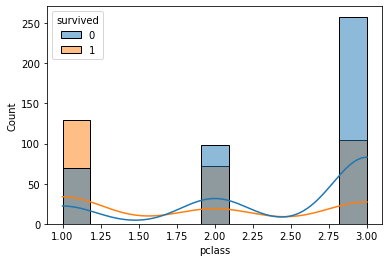

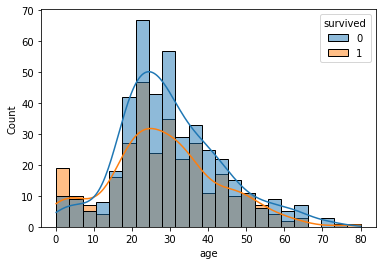

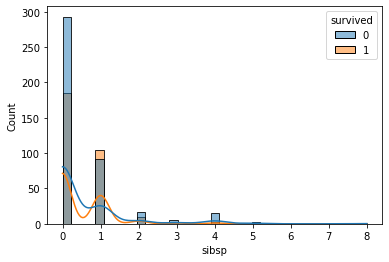

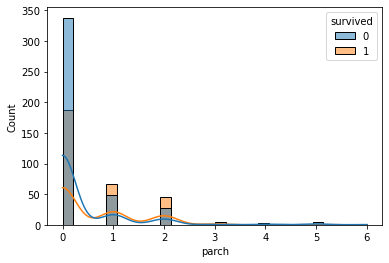

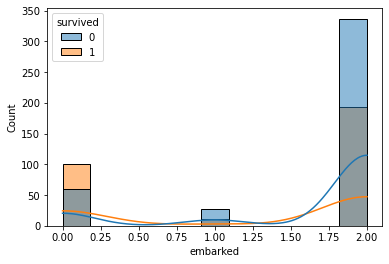

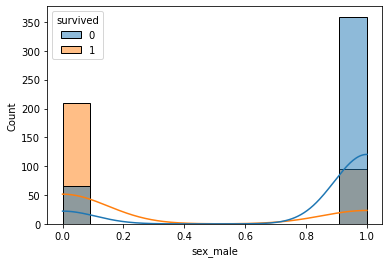

In [77]:
for col in X_train:
    
    sns.histplot(data=X_train, x=col, kde=True, hue=y_train)
    
    plt.show()

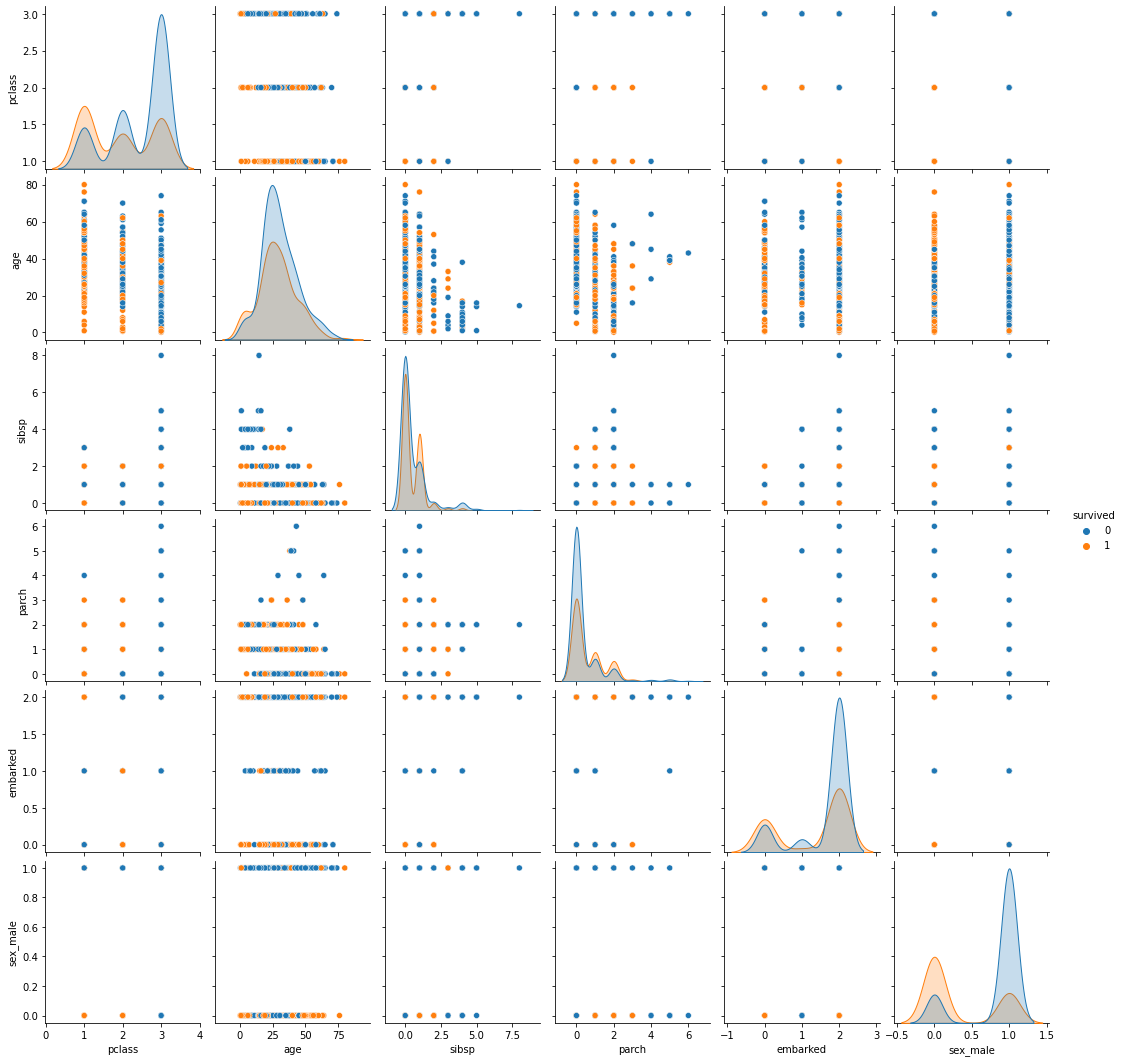

In [78]:
sns.pairplot(data=pd.concat([X_train, y_train], axis=1), hue="survived")

In [79]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression().fit(X_train, y_train)

In [80]:
logit.intercept_

array([4.95])

In [81]:
logit.feature_names_in_

array(['pclass', 'age', 'sibsp', 'parch', 'embarked', 'sex_male'],
      dtype=object)

In [82]:
logit.coef_

array([[-0.959, -0.037, -0.347,  0.053, -0.295, -2.492]])

In [83]:
logit.coef_[0][2]

-0.3466621849436168

In [84]:
X_test

,pclass,age,sibsp,parch,embarked,sex_male
1207,3,10.000,3,2,2,1
321,1,62.000,0,0,2,1
591,2,5.000,1,2,2,0
937,3,1.000,1,1,2,0
707,3,28.000,0,0,2,1
...,...,...,...,...,...,...
1110,3,32.000,0,0,2,1
1119,3,22.000,0,0,2,1
322,1,36.000,0,0,0,0
305,1,60.000,0,0,2,1


In [85]:
y_test.values

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [86]:
X_test

,pclass,age,sibsp,parch,embarked,sex_male
1207,3,10.000,3,2,2,1
321,1,62.000,0,0,2,1
591,2,5.000,1,2,2,0
937,3,1.000,1,1,2,0
707,3,28.000,0,0,2,1
...,...,...,...,...,...,...
1110,3,32.000,0,0,2,1
1119,3,22.000,0,0,2,1
322,1,36.000,0,0,0,0
305,1,60.000,0,0,2,1


In [87]:
logit.predict(X_test)

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [88]:
logit.classes_

array([0, 1], dtype=int64)

In [89]:
proba_1 = logit.predict_proba(X_test)[:, 1]

proba_1

array([0.09 , 0.2  , 0.882, 0.76 , 0.114, 0.592, 0.1  , 0.36 , 0.134,
       0.126, 0.336, 0.863, 0.183, 0.114, 0.206, 0.328, 0.148, 0.661,
       0.795, 0.745, 0.712, 0.908, 0.162, 0.2  , 0.83 , 0.709, 0.805,
       0.244, 0.143, 0.13 , 0.054, 0.563, 0.669, 0.572, 0.082, 0.742,
       0.934, 0.504, 0.178, 0.529, 0.139, 0.834, 0.139, 0.238, 0.849,
       0.088, 0.957, 0.392, 0.114, 0.903, 0.809, 0.839, 0.111, 0.153,
       0.569, 0.108, 0.078, 0.13 , 0.13 , 0.153, 0.135, 0.357, 0.739,
       0.059, 0.775, 0.388, 0.045, 0.541, 0.618, 0.375, 0.32 , 0.13 ,
       0.918, 0.55 , 0.904, 0.677, 0.44 , 0.927, 0.751, 0.103, 0.091,
       0.304, 0.937, 0.552, 0.388, 0.035, 0.319, 0.606, 0.477, 0.216,
       0.107, 0.079, 0.097, 0.831, 0.609, 0.266, 0.803, 0.529, 0.628,
       0.504, 0.13 , 0.238, 0.288, 0.911, 0.632, 0.265, 0.391, 0.223,
       0.416, 0.235, 0.391, 0.143, 0.303, 0.809, 0.865, 0.135, 0.074,
       0.062, 0.311, 0.801, 0.126, 0.143, 0.158, 0.788, 0.049, 0.458,
       0.229, 0.848,

In [90]:
proba_1 = logit.predict_proba(X_test)[:, 1]
cutoff = 0.5
y_pred = np.where(proba_1 >= cutoff, 1, 0)

y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [91]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[162  32]
 [ 35  85]]


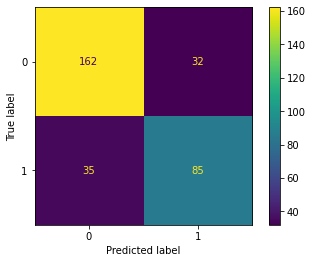

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

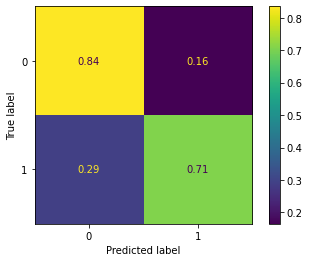

In [93]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true")

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       194
           1       0.73      0.71      0.72       120

    accuracy                           0.79       314
   macro avg       0.77      0.77      0.77       314
weighted avg       0.79      0.79      0.79       314



In [95]:
cr_dict = classification_report(y_test, y_pred, output_dict=True)

In [96]:
cr_dict

{'0': {'precision': 0.8223350253807107,
  'recall': 0.8350515463917526,
  'f1-score': 0.8286445012787723,
  'support': 194},
 '1': {'precision': 0.7264957264957265,
  'recall': 0.7083333333333334,
  'f1-score': 0.7172995780590717,
  'support': 120},
 'accuracy': 0.7866242038216561,
 'macro avg': {'precision': 0.7744153759382186,
  'recall': 0.771692439862543,
  'f1-score': 0.772972039668922,
  'support': 314},
 'weighted avg': {'precision': 0.7857085417303983,
  'recall': 0.7866242038216561,
  'f1-score': 0.7860923013221989,
  'support': 314}}

In [97]:
def clf_metrics(modelo, X, y, cutoff=0.5, label_metrica="", print_plot=True):
    
    proba_1 = logit.predict_proba(X)[:, 1]
    y_pred = np.where(proba_1 >= cutoff, 1, 0)
    
    if print_plot:
        
        print(f"Métricas de avaliação de {label_metrica}")
    
        ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize=None)
        plt.show()
    
        print(classification_report(y, y_pred))
    
    return classification_report(y, y_pred, output_dict=True)


################################################################################
                         Modelo logit com cutoff = 0.1                          
################################################################################

Métricas de avaliação de teste


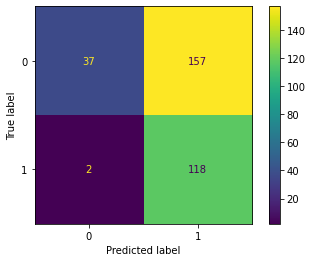

              precision    recall  f1-score   support

           0       0.95      0.19      0.32       194
           1       0.43      0.98      0.60       120

    accuracy                           0.49       314
   macro avg       0.69      0.59      0.46       314
weighted avg       0.75      0.49      0.42       314


################################################################################
                 Modelo logit com cutoff = 0.15000000000000002                  
################################################################################

Métricas de avaliação de teste


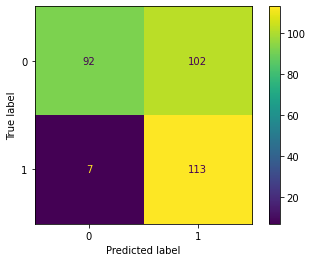

              precision    recall  f1-score   support

           0       0.93      0.47      0.63       194
           1       0.53      0.94      0.67       120

    accuracy                           0.65       314
   macro avg       0.73      0.71      0.65       314
weighted avg       0.78      0.65      0.65       314


################################################################################
                 Modelo logit com cutoff = 0.20000000000000004                  
################################################################################

Métricas de avaliação de teste


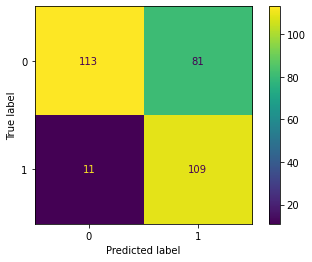

              precision    recall  f1-score   support

           0       0.91      0.58      0.71       194
           1       0.57      0.91      0.70       120

    accuracy                           0.71       314
   macro avg       0.74      0.75      0.71       314
weighted avg       0.78      0.71      0.71       314


################################################################################
                 Modelo logit com cutoff = 0.25000000000000006                  
################################################################################

Métricas de avaliação de teste


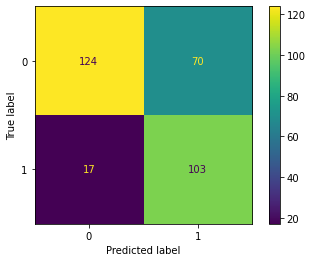

              precision    recall  f1-score   support

           0       0.88      0.64      0.74       194
           1       0.60      0.86      0.70       120

    accuracy                           0.72       314
   macro avg       0.74      0.75      0.72       314
weighted avg       0.77      0.72      0.73       314


################################################################################
                 Modelo logit com cutoff = 0.30000000000000004                  
################################################################################

Métricas de avaliação de teste


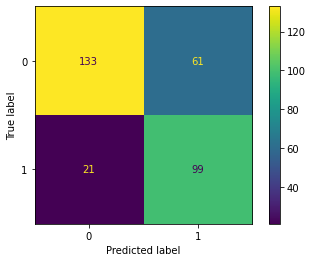

              precision    recall  f1-score   support

           0       0.86      0.69      0.76       194
           1       0.62      0.82      0.71       120

    accuracy                           0.74       314
   macro avg       0.74      0.76      0.74       314
weighted avg       0.77      0.74      0.74       314


################################################################################
                  Modelo logit com cutoff = 0.3500000000000001                  
################################################################################

Métricas de avaliação de teste


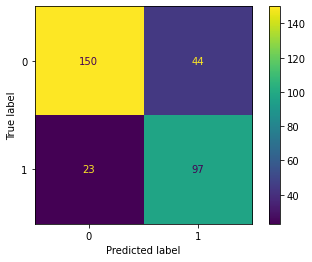

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       194
           1       0.69      0.81      0.74       120

    accuracy                           0.79       314
   macro avg       0.78      0.79      0.78       314
weighted avg       0.80      0.79      0.79       314


################################################################################
                 Modelo logit com cutoff = 0.40000000000000013                  
################################################################################

Métricas de avaliação de teste


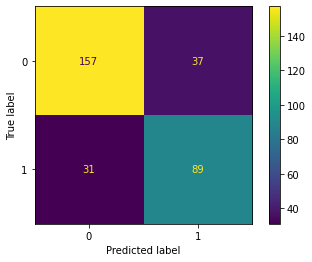

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       194
           1       0.71      0.74      0.72       120

    accuracy                           0.78       314
   macro avg       0.77      0.78      0.77       314
weighted avg       0.79      0.78      0.78       314


################################################################################
                 Modelo logit com cutoff = 0.45000000000000007                  
################################################################################

Métricas de avaliação de teste


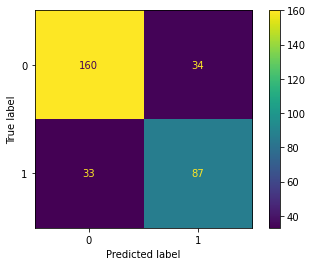

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       194
           1       0.72      0.72      0.72       120

    accuracy                           0.79       314
   macro avg       0.77      0.77      0.77       314
weighted avg       0.79      0.79      0.79       314


################################################################################
                  Modelo logit com cutoff = 0.5000000000000001                  
################################################################################

Métricas de avaliação de teste


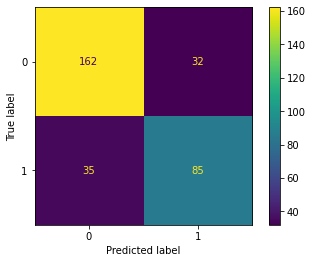

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       194
           1       0.73      0.71      0.72       120

    accuracy                           0.79       314
   macro avg       0.77      0.77      0.77       314
weighted avg       0.79      0.79      0.79       314


################################################################################
                  Modelo logit com cutoff = 0.5500000000000002                  
################################################################################

Métricas de avaliação de teste


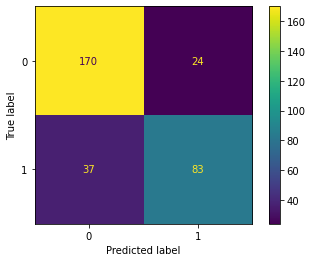

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       194
           1       0.78      0.69      0.73       120

    accuracy                           0.81       314
   macro avg       0.80      0.78      0.79       314
weighted avg       0.80      0.81      0.80       314


################################################################################
                  Modelo logit com cutoff = 0.6000000000000002                  
################################################################################

Métricas de avaliação de teste


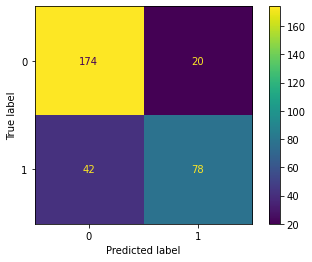

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       194
           1       0.80      0.65      0.72       120

    accuracy                           0.80       314
   macro avg       0.80      0.77      0.78       314
weighted avg       0.80      0.80      0.80       314


################################################################################
                  Modelo logit com cutoff = 0.6500000000000001                  
################################################################################

Métricas de avaliação de teste


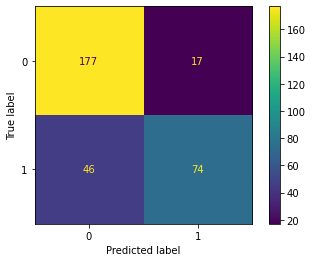

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       194
           1       0.81      0.62      0.70       120

    accuracy                           0.80       314
   macro avg       0.80      0.76      0.78       314
weighted avg       0.80      0.80      0.79       314


################################################################################
                  Modelo logit com cutoff = 0.7000000000000002                  
################################################################################

Métricas de avaliação de teste


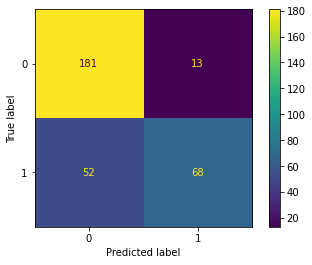

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       194
           1       0.84      0.57      0.68       120

    accuracy                           0.79       314
   macro avg       0.81      0.75      0.76       314
weighted avg       0.80      0.79      0.78       314


################################################################################
                  Modelo logit com cutoff = 0.7500000000000002                  
################################################################################

Métricas de avaliação de teste


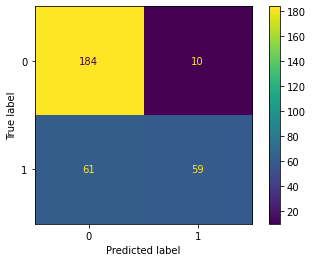

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       194
           1       0.86      0.49      0.62       120

    accuracy                           0.77       314
   macro avg       0.80      0.72      0.73       314
weighted avg       0.79      0.77      0.76       314


################################################################################
                  Modelo logit com cutoff = 0.8000000000000002                  
################################################################################

Métricas de avaliação de teste


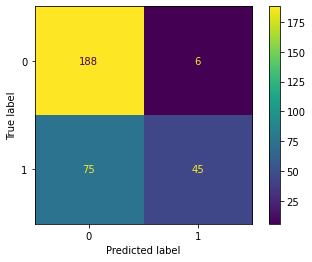

              precision    recall  f1-score   support

           0       0.71      0.97      0.82       194
           1       0.88      0.38      0.53       120

    accuracy                           0.74       314
   macro avg       0.80      0.67      0.67       314
weighted avg       0.78      0.74      0.71       314


################################################################################
                  Modelo logit com cutoff = 0.8500000000000002                  
################################################################################

Métricas de avaliação de teste


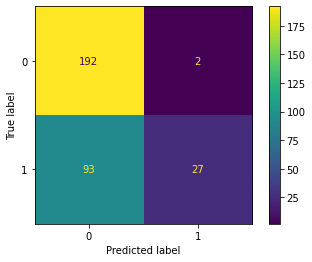

              precision    recall  f1-score   support

           0       0.67      0.99      0.80       194
           1       0.93      0.23      0.36       120

    accuracy                           0.70       314
   macro avg       0.80      0.61      0.58       314
weighted avg       0.77      0.70      0.63       314


################################################################################
                  Modelo logit com cutoff = 0.9000000000000002                  
################################################################################

Métricas de avaliação de teste


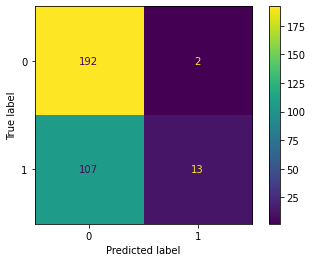

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       194
           1       0.87      0.11      0.19       120

    accuracy                           0.65       314
   macro avg       0.75      0.55      0.49       314
weighted avg       0.73      0.65      0.55       314


################################################################################
                  Modelo logit com cutoff = 0.9500000000000003                  
################################################################################

Métricas de avaliação de teste


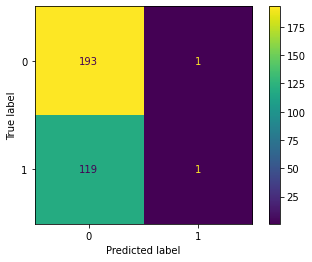

              precision    recall  f1-score   support

           0       0.62      0.99      0.76       194
           1       0.50      0.01      0.02       120

    accuracy                           0.62       314
   macro avg       0.56      0.50      0.39       314
weighted avg       0.57      0.62      0.48       314



In [98]:
# começamos com dois dfs vazios, e vamos preenchendo abaixo
# (com os concats)
df_results_train = pd.DataFrame()
df_results_test = pd.DataFrame()

cutoff_list = np.arange(0.1, 1, 0.05)

for cutoff in cutoff_list:
    
    print()
    print("#"*80)
    print(f"Modelo logit com cutoff = {cutoff}".center(80))
    print("#"*80)
    print()
    
    # ============================================
    
    cr_train = clf_metrics(logit, X_train, y_train, label_metrica="treino", cutoff=cutoff, print_plot=False)
    df_cr_train = pd.DataFrame(cr_train)

    # o .iloc[:-1, :] é pra excluir o "support" (pode trazer tb caso queira)
    df_melt = df_cr_train.iloc[:-1, :].reset_index(drop=False).melt(id_vars='index', var_name="type")
    df_melt['cutoff'] = cutoff

    # corrigindo os dados de acurácia
    accuracy = df_melt.query("type == 'accuracy'").copy()
    accuracy["index"] = "accuracy"

    df_melt = df_melt.drop(index=accuracy.index)
    df_melt = pd.concat([df_melt, accuracy.iloc[[0], :]]).reset_index(drop=False)

    # pivotando
    df_pivot = df_melt.pivot(columns=['type', 'index'], values='value', index='cutoff')
    
    df_results_train = pd.concat([df_results_train, df_pivot])
            
    # ============================================
    
    cr_test = clf_metrics(logit, X_test, y_test, label_metrica="teste", cutoff=cutoff)
    df_cr_test = pd.DataFrame(cr_test)
    
    # o .iloc[:-1, :] é pra excluir o "support" (pode trazer tb caso queira)
    df_melt = df_cr_test.iloc[:-1, :].reset_index(drop=False).melt(id_vars='index', var_name="type")
    df_melt['cutoff'] = cutoff

    # corrigindo os dados de acurácia
    accuracy = df_melt.query("type == 'accuracy'").copy()
    accuracy["index"] = "accuracy"

    df_melt = df_melt.drop(index=accuracy.index)
    df_melt = pd.concat([df_melt, accuracy.iloc[[0], :]]).reset_index(drop=False)

    # pivotando
    df_pivot = df_melt.pivot(columns=['type', 'index'], values='value', index='cutoff')
    
    df_results_test = pd.concat([df_results_test, df_pivot])
    
    # ============================================

In [99]:
df_results_train

df_results_train.sort_values(('1', 'precision'), ascending=False)

type           0                         1                 macro avg         \
index  precision recall f1-score precision recall f1-score precision recall   
cutoff                                                                        
0.950      0.590  1.000    0.742     1.000  0.033    0.063     0.795  0.516   
0.900      0.633  0.998    0.774     0.983  0.193    0.323     0.808  0.596   
0.850      0.669  0.995    0.800     0.980  0.315    0.476     0.824  0.655   
0.800      0.694  0.988    0.816     0.960  0.393    0.558     0.827  0.691   
0.750      0.726  0.976    0.832     0.937  0.485    0.639     0.831  0.731   
0.700      0.747  0.965    0.842     0.917  0.544    0.683     0.832  0.754   
0.650      0.771  0.934    0.845     0.870  0.613    0.719     0.820  0.774   
0.600      0.782  0.896    0.836     0.819  0.652    0.726     0.801  0.774   
0.550      0.803  0.873    0.837     0.799  0.702    0.747     0.801  0.787   
0.500      0.804  0.842    0.823     0.765  0.715    0.739     0.785  0.779   
0.450      0.809  0.819    0.814     0.743  0.731    0.737     0.776  0.775   
0.400      0.815  0.788    0.801     0.718  0.751    0.734     0.766  0.770   
0.350      0.829  0.765    0.796     0.704  0.780    0.740     0.767  0.773   
0.300      0.842  0.715    0.774     0.672  0.813    0.736     0.757  0.764   
0.250      0.845  0.628    0.721     0.618  0.839    0.712     0.732  0.734   
0.200      0.850  0.534    0.656     0.572  0.869    0.690     0.711  0.701   
0.150      0.847  0.402    0.545     0.519  0.898    0.658     0.683  0.650   
0.100      0.928  0.181    0.303     0.462  0.980    0.628     0.695  0.581   

type            weighted avg                 accuracy  
index  f1-score    precision recall f1-score accuracy  
cutoff                                                 
0.950     0.403        0.761  0.596    0.459    0.596  
0.900     0.549        0.779  0.662    0.586    0.662  
0.850     0.638        0.799  0.711    0.665    0.711  
0.800     0.687        0.805  0.740    0.708    0.740  
0.750     0.736        0.814  0.771    0.752    0.771  
0.700     0.763        0.818  0.789    0.776    0.789  
0.650     0.782        0.812  0.800    0.792    0.800  
0.600     0.781        0.798  0.795    0.790    0.795  
0.550     0.792        0.801  0.801    0.799    0.801  
0.500     0.781        0.788  0.789    0.788    0.789  
0.450     0.776        0.782  0.782    0.782    0.782  
0.400     0.768        0.774  0.773    0.773    0.773  
0.350     0.768        0.777  0.771    0.772    0.771  
0.300     0.755        0.771  0.756    0.758    0.756  
0.250     0.716        0.750  0.716    0.717    0.716  
0.200     0.673        0.734  0.674    0.670    0.674  
0.150     0.602        0.710  0.610    0.592    0.610  
0.100     0.466        0.733  0.515    0.439    0.515

In [100]:
df_results_test

df_results_test.sort_values(('1', 'f1-score'), ascending=False)

type           0                         1                 macro avg         \
index  precision recall f1-score precision recall f1-score precision recall   
cutoff                                                                        
0.350      0.867  0.773    0.817     0.688  0.808    0.743     0.777  0.791   
0.550      0.821  0.876    0.848     0.776  0.692    0.731     0.798  0.784   
0.400      0.835  0.809    0.822     0.706  0.742    0.724     0.771  0.775   
0.450      0.829  0.825    0.827     0.719  0.725    0.722     0.774  0.775   
0.500      0.822  0.835    0.829     0.726  0.708    0.717     0.774  0.772   
0.600      0.806  0.897    0.849     0.796  0.650    0.716     0.801  0.773   
0.300      0.864  0.686    0.764     0.619  0.825    0.707     0.741  0.755   
0.200      0.911  0.582    0.711     0.574  0.908    0.703     0.742  0.745   
0.250      0.879  0.639    0.740     0.595  0.858    0.703     0.737  0.749   
0.650      0.794  0.912    0.849     0.813  0.617    0.701     0.803  0.765   
0.700      0.777  0.933    0.848     0.840  0.567    0.677     0.808  0.750   
0.150      0.929  0.474    0.628     0.526  0.942    0.675     0.727  0.708   
0.750      0.751  0.948    0.838     0.855  0.492    0.624     0.803  0.720   
0.100      0.949  0.191    0.318     0.429  0.983    0.597     0.689  0.587   
0.800      0.715  0.969    0.823     0.882  0.375    0.526     0.799  0.672   
0.850      0.674  0.990    0.802     0.931  0.225    0.362     0.802  0.607   
0.900      0.642  0.990    0.779     0.867  0.108    0.193     0.754  0.549   
0.950      0.619  0.995    0.763     0.500  0.008    0.016     0.559  0.502   

type            weighted avg                 accuracy  
index  f1-score    precision recall f1-score accuracy  
cutoff                                                 
0.350     0.780        0.799  0.787    0.789    0.787  
0.550     0.790        0.804  0.806    0.803    0.806  
0.400     0.773        0.786  0.783    0.784    0.783  
0.450     0.774        0.787  0.787    0.787    0.787  
0.500     0.773        0.786  0.787    0.786    0.787  
0.600     0.782        0.802  0.803    0.798    0.803  
0.300     0.736        0.770  0.739    0.742    0.739  
0.200     0.707        0.782  0.707    0.708    0.707  
0.250     0.722        0.771  0.723    0.726    0.723  
0.650     0.775        0.801  0.799    0.793    0.799  
0.700     0.762        0.801  0.793    0.782    0.793  
0.150     0.651        0.775  0.653    0.646    0.653  
0.750     0.731        0.791  0.774    0.757    0.774  
0.100     0.458        0.750  0.494    0.425    0.494  
0.800     0.675        0.779  0.742    0.709    0.742  
0.850     0.582        0.772  0.697    0.634    0.697  
0.900     0.486        0.728  0.653    0.555    0.653  
0.950     0.390        0.573  0.618    0.478    0.618

In [101]:
df_results_test

df_results_test.sort_values(('weighted avg', 'f1-score'), ascending=False)

type           0                         1                 macro avg         \
index  precision recall f1-score precision recall f1-score precision recall   
cutoff                                                                        
0.550      0.821  0.876    0.848     0.776  0.692    0.731     0.798  0.784   
0.600      0.806  0.897    0.849     0.796  0.650    0.716     0.801  0.773   
0.650      0.794  0.912    0.849     0.813  0.617    0.701     0.803  0.765   
0.350      0.867  0.773    0.817     0.688  0.808    0.743     0.777  0.791   
0.450      0.829  0.825    0.827     0.719  0.725    0.722     0.774  0.775   
0.500      0.822  0.835    0.829     0.726  0.708    0.717     0.774  0.772   
0.400      0.835  0.809    0.822     0.706  0.742    0.724     0.771  0.775   
0.700      0.777  0.933    0.848     0.840  0.567    0.677     0.808  0.750   
0.750      0.751  0.948    0.838     0.855  0.492    0.624     0.803  0.720   
0.300      0.864  0.686    0.764     0.619  0.825    0.707     0.741  0.755   
0.250      0.879  0.639    0.740     0.595  0.858    0.703     0.737  0.749   
0.800      0.715  0.969    0.823     0.882  0.375    0.526     0.799  0.672   
0.200      0.911  0.582    0.711     0.574  0.908    0.703     0.742  0.745   
0.150      0.929  0.474    0.628     0.526  0.942    0.675     0.727  0.708   
0.850      0.674  0.990    0.802     0.931  0.225    0.362     0.802  0.607   
0.900      0.642  0.990    0.779     0.867  0.108    0.193     0.754  0.549   
0.950      0.619  0.995    0.763     0.500  0.008    0.016     0.559  0.502   
0.100      0.949  0.191    0.318     0.429  0.983    0.597     0.689  0.587   

type            weighted avg                 accuracy  
index  f1-score    precision recall f1-score accuracy  
cutoff                                                 
0.550     0.790        0.804  0.806    0.803    0.806  
0.600     0.782        0.802  0.803    0.798    0.803  
0.650     0.775        0.801  0.799    0.793    0.799  
0.350     0.780        0.799  0.787    0.789    0.787  
0.450     0.774        0.787  0.787    0.787    0.787  
0.500     0.773        0.786  0.787    0.786    0.787  
0.400     0.773        0.786  0.783    0.784    0.783  
0.700     0.762        0.801  0.793    0.782    0.793  
0.750     0.731        0.791  0.774    0.757    0.774  
0.300     0.736        0.770  0.739    0.742    0.739  
0.250     0.722        0.771  0.723    0.726    0.723  
0.800     0.675        0.779  0.742    0.709    0.742  
0.200     0.707        0.782  0.707    0.708    0.707  
0.150     0.651        0.775  0.653    0.646    0.653  
0.850     0.582        0.772  0.697    0.634    0.697  
0.900     0.486        0.728  0.653    0.555    0.653  
0.950     0.390        0.573  0.618    0.478    0.618  
0.100     0.458        0.750  0.494    0.425    0.494

In [102]:
y_proba_1 = logit.predict_proba(X_test)[:, 1]

In [103]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, cutoffs = precision_recall_curve(y_test, y_proba_1)

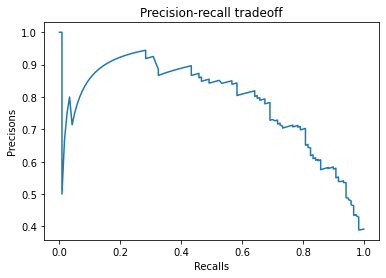

In [104]:
plt.title("Precision-recall tradeoff")

plt.plot(recalls, precisions)

plt.xlabel("Recalls")
plt.ylabel("Precisons")

plt.show()

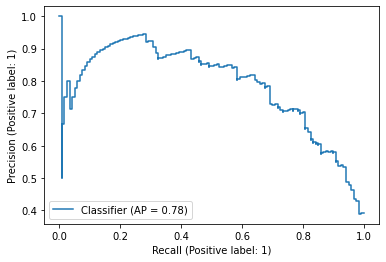

In [105]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, y_proba_1);

In [106]:
cutoffs[np.where(precisions == recalls)]

array([0.459])

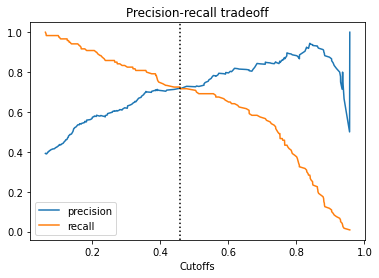

In [107]:
plt.title("Precision-recall tradeoff")

plt.plot(cutoffs, precisions[:-1], label="precision")
plt.plot(cutoffs, recalls[:-1], label="recall")

plt.xlabel("Cutoffs")

ponto_de_encontro = cutoffs[np.where(precisions == recalls)]
plt.axvline(x=ponto_de_encontro, ls=":", color="k")

plt.legend()
plt.show()

In [108]:
from sklearn.metrics import roc_curve

fpr, tpr, cutoffs = roc_curve(y_test, y_proba_1)

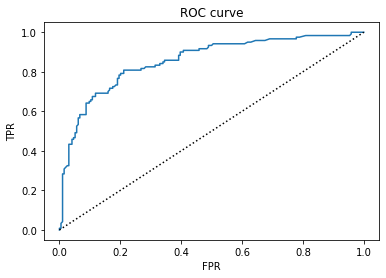

In [109]:
plt.title("ROC curve")

plt.plot(fpr, tpr)

plt.xlabel("FPR")
plt.ylabel("TPR")

x = np.linspace(0, 1, 2)
plt.plot(x, x, color="k", ls=":")

plt.show()

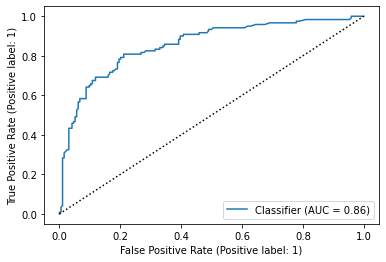

In [110]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_proba_1)

x = np.linspace(0, 1, 2)
plt.plot(x, x, color="k", ls=":");

In [111]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba_1)

0.8557130584192439

## Analyzing cross-validation metrics

In [112]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)



# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(logit, X, y, cv=kf, scoring='accuracy')

# Print scores
print(cv_scores)

[0.782 0.77  0.776 0.793 0.787 0.816]


In [113]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [.025, .975]))

0.7873563218390806
0.014839016652135708
[0.771 0.813]


___
___
___

### Problema 2 - Tips

Base `tips.csv` na pasta `/datasets`

In [114]:
tips = pd.read_csv('datasets/tips.csv')

In [115]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.030,5.920,Male,No,Sat,Dinner,3
240,27.180,2.000,Female,Yes,Sat,Dinner,2
241,22.670,2.000,Male,Yes,Sat,Dinner,2
242,17.820,1.750,Male,No,Sat,Dinner,2


In [116]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [117]:
tips.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [118]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [119]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [120]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [121]:
l=LabelEncoder()
tips['sex']=l.fit_transform(tips['sex'])

l=LabelEncoder()
tips['smoker']=l.fit_transform(tips['smoker'])

l=LabelEncoder()
tips['day']=l.fit_transform(tips['day'])

l=LabelEncoder()
tips['time']=l.fit_transform(tips['time'])

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

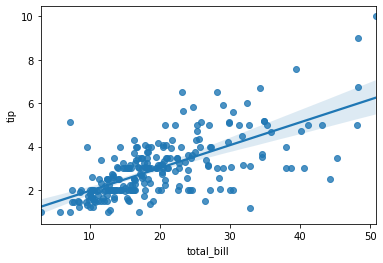

In [122]:
sns.regplot(x='total_bill', y='tip', data=tips)

In [123]:
X = tips.drop(columns='tip')
X

,total_bill,sex,smoker,day,time,size
0,16.990,0,0,2,0,2
1,10.340,1,0,2,0,3
2,21.010,1,0,2,0,3
3,23.680,1,0,2,0,2
4,24.590,0,0,2,0,4
...,...,...,...,...,...,...
239,29.030,1,0,1,0,3
240,27.180,0,1,1,0,2
241,22.670,1,1,1,0,2
242,17.820,1,0,1,0,2


In [124]:
y = tips['tip']
y

0     1.010
1     1.660
2     3.500
3     3.310
4     3.610
       ... 
239   5.920
240   2.000
241   2.000
242   1.750
243   3.000
Name: tip, Length: 244, dtype: float64

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Métricas de avaliação (dados de treino):



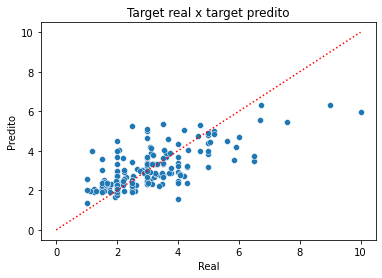

R^2: 0.49
MAE: 0.77
RMSE: 1.04
MAPE: 28.52%

Distribuição dos resíduos de treino:

count   170.000
mean     -0.000
std       1.044
min      -2.803
25%      -0.604
50%      -0.096
75%       0.585
max       4.023
Name: tip, dtype: float64


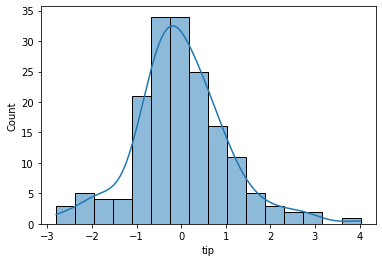


##################################################

Métricas de avaliação (dados de teste):



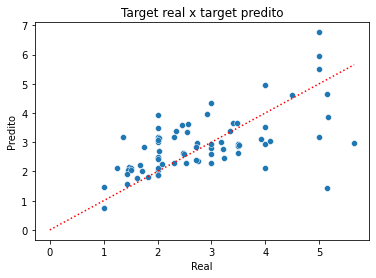

R^2: 0.29
MAE: 0.72
RMSE: 0.97
MAPE: 27.73%

Distribuição dos resíduos de teste:

count   74.000
mean    -0.120
std      0.966
min     -1.942
25%     -0.761
50%     -0.153
75%      0.369
max      3.722
Name: tip, dtype: float64


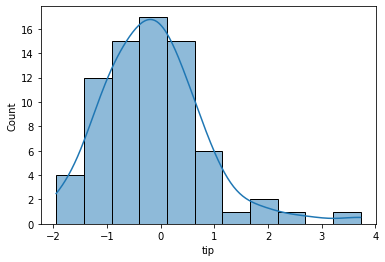

LinearRegression()

In [126]:
reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, 
                    plot=True, scale_mms=True, 
                    train_metrics=True, dist_resids=True)

Modelo com espaço de features transformado!

Número de features original: 6
Número de features após o transformer: 27


Métricas de avaliação (dados de treino):



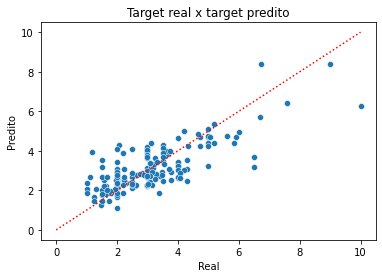

R^2: 0.61
MAE: 0.67
RMSE: 0.91
MAPE: 25.72%

Distribuição dos resíduos de treino:

count   170.000
mean      0.000
std       0.917
min      -2.766
25%      -0.533
50%      -0.063
75%       0.577
max       3.734
Name: tip, dtype: float64


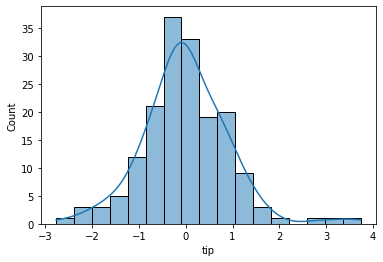


##################################################

Métricas de avaliação (dados de teste):



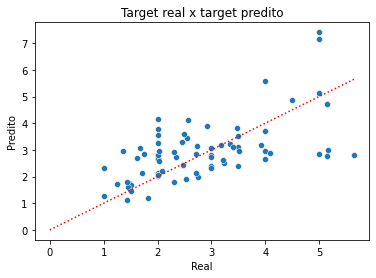

R^2: 0.19
MAE: 0.78
RMSE: 1.03
MAPE: 30.53%

Distribuição dos resíduos de teste:

count   74.000
mean    -0.143
std      1.028
min     -2.409
25%     -0.812
50%     -0.129
75%      0.486
max      2.855
Name: tip, dtype: float64


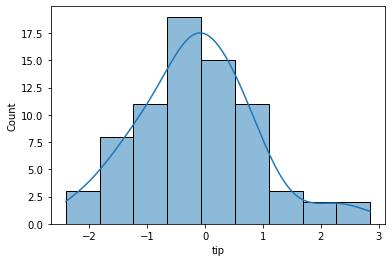

(LinearRegression(),
 {'r2': 0.6086825169412402,
  'mae': 0.6695121047066852,
  'rmse': 0.9141738081775014,
  'mape': 0.25723869609889616},
 {'r2': 0.19377334035498084,
  'mae': 0.7828928024419428,
  'rmse': 1.0309021615944824,
  'mape': 0.305326459637925})

In [127]:
reg_lin_poly_features(X_train, y_train, X_test, y_test, 
                          deg=2,
                          plot=True, scale_mms=False, 
                          train_metrics=True, 
                          dist_resids=True,
                          plot_model=False)

In [128]:
def reg_lin_poly_features_regularized(X_train, y_train, X_test, y_test, 
                                      deg=1,
                                      type_regularization=None, alpha=1, l1_ratio=0.5,
                                      iter_max=1000,
                                      plot=True, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=True,
                                      plot_model=False):
    '''
    docstring
    - type_regularization: None, "l1", "l2", "en"
    '''
    
    # dimensão dos dados de input
    data_dim = X_train.shape[1]
    
    # é importante salvar os dados originais pra plotá-los!
    # isso é importante pra caso haja transformação no espaço de features
    X_train_orig = X_train.copy()
    X_test_orig = X_test.copy()
    
    if deg > 1:
        
        pf = PolynomialFeatures(degree=deg, include_bias=False).fit(X_train)
        
        X_train = pf.transform(X_train)
        X_test = pf.transform(X_test)
        
        print(f"Modelo com espaço de features transformado!\n")
        print(f"Número de features original: {pf.n_features_in_}")
        print(f"Número de features após o transformer: {pf.n_output_features_}\n")
        print("="*50)
        
    # é importante escalar depois!
    # note que o "or type_regularization" garante que haja normalização 
    # se a regulatrização for usada, mesmo que "scale_mms" seja False ;)
    if scale_mms or type_regularization:

        mms = MinMaxScaler().fit(X_train)

        # não to trazendo o nome das colunas, então não vai mais ter o atributo feature_names_in_!
        # caso queira/precise, tem que alterar a função
        X_train = mms.transform(X_train)
        X_test = mms.transform(X_test)

    # ===============================
    # passo 1 - construção do modelo
    
    if type_regularization == "l1":
        
        model = Lasso(alpha=alpha, max_iter=iter_max).fit(X_train, y_train)
        
    elif type_regularization == "l2":
        
        model = Ridge(alpha=alpha, max_iter=iter_max).fit(X_train, y_train)
        
    elif type_regularization == "en":
        
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=iter_max).fit(X_train, y_train)
        
    elif type_regularization == None:
    
        model = LinearRegression().fit(X_train, y_train)
        
    else:
        
        list_opcoes = ["l1", "l2", "en", None]
        raise ValueError(f"Opção de regularização indisponível!\nOpções aceitas: {list_opcoes}")


    # ===============================
    # passo 2 - avaliação do modelo
    
    if train_metrics:
        metrics_train = calc_reg_metrics(model, X_train, y_train, label="treino", 
                                         plot=plot, dist_resids=dist_resids, print_stuff=True)
        print()
        print("#"*50)
    else:
        metrics_train = None
        
    metrics_test = calc_reg_metrics(model, X_test, y_test, label="teste",
                                     plot=plot, dist_resids=dist_resids, print_stuff=True)
    
    # só é possível quando temos uma única feature no espaço de features original!
    if plot_model and data_dim == 1:
        # note que passamos as features originais!!
        plot_reglin_model(model, X_train_orig, y_train, X_test_orig, y_test)

    # new: returnando o objeto do modelo treinado!
    return model, metrics_train, metrics_test

In [129]:
model, metrics_train, metrics_test  = reg_lin_poly_features_regularized(X_train, y_train,
                                      X_test, y_test,  
                                      deg=2,
                                      type_regularization=None,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 6
Número de features após o transformer: 27


Métricas de avaliação (dados de treino):

R^2: 0.61
MAE: 0.67
RMSE: 0.91
MAPE: 25.72%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.19
MAE: 0.78
RMSE: 1.03
MAPE: 30.53%


In [130]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [131]:
_ = reg_lin_poly_features_regularized(X_train, y_train,
                                      X_test, y_test,  
                                      deg=2,
                                      type_regularization="l1", alpha=50,
                                      iter_max=2000,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 6
Número de features após o transformer: 27


Métricas de avaliação (dados de treino):

R^2: 0.00
MAE: 1.07
RMSE: 1.46
MAPE: 41.77%

##################################################

Métricas de avaliação (dados de teste):

R^2: -0.07
MAE: 1.01
RMSE: 1.19
MAPE: 46.60%


In [132]:
modelo, _, _ = reg_lin_poly_features_regularized(X_train, y_train,
                                      X_test, y_test,  
                                      deg=2,
                                      type_regularization="l1", alpha=.5,
                                      iter_max=2000,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 6
Número de features após o transformer: 27


Métricas de avaliação (dados de treino):

R^2: 0.00
MAE: 1.07
RMSE: 1.46
MAPE: 41.77%

##################################################

Métricas de avaliação (dados de teste):

R^2: -0.07
MAE: 1.01
RMSE: 1.19
MAPE: 46.60%


In [133]:
_ = reg_lin_poly_features_regularized(X_train, y_train,
                                      X_test, y_test,  
                                      deg=4,
                                      type_regularization="l2", alpha=120,
                                      iter_max=2000,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 6
Número de features após o transformer: 209


Métricas de avaliação (dados de treino):

R^2: 0.39
MAE: 0.87
RMSE: 1.14
MAPE: 33.83%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.22
MAE: 0.83
RMSE: 1.01
MAPE: 37.43%


In [134]:
_ = reg_lin_poly_features_regularized(X_train, y_train,
                                      X_test, y_test,  
                                      deg=1,
                                      type_regularization="en", alpha=.1, l1_ratio=.99,
                                      iter_max=20000,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)


Métricas de avaliação (dados de treino):

R^2: 0.34
MAE: 0.90
RMSE: 1.19
MAPE: 34.44%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.34
MAE: 0.77
RMSE: 0.93
MAPE: 34.62%


___
___
___

### Problema 3: house prices

Base `house_prices.csv` na pasta `/datasets`

In [135]:
house = pd.read_csv('house_prices.csv')

In [136]:
house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [137]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [138]:
nulos = house.isnull().sum()

In [139]:
nulos

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [140]:
(nulos[nulos > 0]/house.shape[0])*100

LotFrontage    17.740
Alley          93.767
MasVnrType      0.548
MasVnrArea      0.548
BsmtQual        2.534
BsmtCond        2.534
BsmtExposure    2.603
BsmtFinType1    2.534
BsmtFinType2    2.603
Electrical      0.068
FireplaceQu    47.260
GarageType      5.548
GarageYrBlt     5.548
GarageFinish    5.548
GarageQual      5.548
GarageCond      5.548
PoolQC         99.521
Fence          80.753
MiscFeature    96.301
dtype: float64

___
___
___

### Problema 4 - Iris

Base `iris.csv` na pasta `/datasets`

In [141]:
iris = pd.read_csv('datasets/iris.csv')

In [142]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


In [143]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [144]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [145]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [146]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [147]:
iris.petal_width.value_counts()

0.200    29
1.300    13
1.500    12
1.800    12
1.400     8
2.300     8
1.000     7
0.400     7
0.300     7
2.100     6
2.000     6
1.200     5
1.900     5
0.100     5
1.600     4
2.500     3
2.200     3
1.100     3
2.400     3
1.700     2
0.500     1
0.600     1
Name: petal_width, dtype: int64

In [148]:
X = titanic_model.drop(columns="survived")
y = titanic_model["survived"]

In [149]:
l=LabelEncoder()
iris['species']=l.fit_transform(iris['species'])

In [150]:
iris.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [151]:
X = iris.drop(columns="species")
y = iris["species"]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

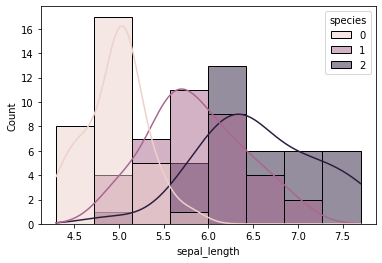

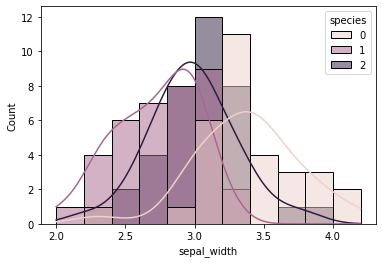

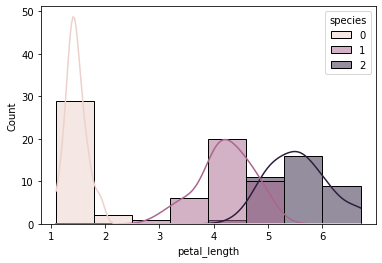

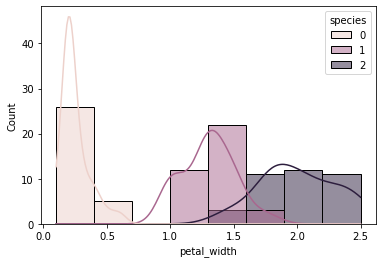

In [153]:
for col in X_train:
    
    sns.histplot(data=X_train, x=col, kde=True, hue=y_train)
    
    plt.show()

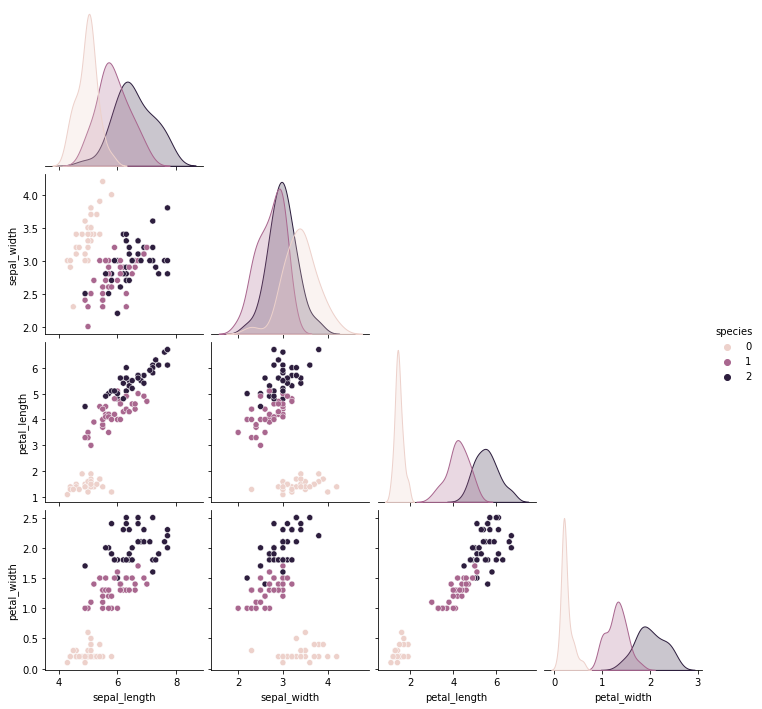

In [154]:
sns.pairplot(data=pd.concat([X_train, y_train], axis=1), hue="species", corner=True)

In [155]:
logit = LogisticRegression().fit(X_train, y_train)

In [156]:
logit.intercept_

array([  8.862,   2.21 , -11.072])

In [157]:
logit.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [158]:
logit.coef_

array([[-0.405,  0.868, -2.278, -0.957],
       [ 0.467, -0.375, -0.188, -0.72 ],
       [-0.062, -0.493,  2.466,  1.678]])

In [159]:
X_test.head(10)

,sepal_length,sepal_width,petal_length,petal_width
73,6.100,2.800,4.700,1.200
18,5.700,3.800,1.700,0.300
118,7.700,2.600,6.900,2.300
78,6.000,2.900,4.500,1.500
76,6.800,2.800,4.800,1.400
31,5.400,3.400,1.500,0.400
64,5.600,2.900,3.600,1.300
141,6.900,3.100,5.100,2.300
68,6.200,2.200,4.500,1.500
82,5.800,2.700,3.900,1.200


In [160]:
y_test.values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [161]:
y_pred = logit.predict(X_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [162]:
logit.classes_

array([0, 1, 2])

In [163]:
proba_1 = logit.predict_proba(X_test)[:, 1]

proba_1

array([0.812, 0.058, 0.002, 0.773, 0.751, 0.05 , 0.904, 0.147, 0.781,
       0.941, 0.225, 0.037, 0.031, 0.044, 0.023, 0.663, 0.027, 0.945,
       0.82 , 0.041, 0.041, 0.387, 0.044, 0.052, 0.02 , 0.106, 0.07 ,
       0.019, 0.039, 0.05 , 0.007, 0.019, 0.89 , 0.035, 0.017, 0.285,
       0.812, 0.036, 0.022, 0.017, 0.194, 0.737, 0.752, 0.018, 0.033])

In [164]:
proba_0 = logit.predict_proba(X_test)[:, 0]

proba_0

array([0.004, 0.942, 0.   , 0.007, 0.002, 0.95 , 0.078, 0.   , 0.002,
       0.029, 0.   , 0.963, 0.969, 0.956, 0.977, 0.005, 0.   , 0.028,
       0.009, 0.   , 0.959, 0.001, 0.956, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.961, 0.95 , 0.993, 0.981, 0.007, 0.965, 0.983, 0.   ,
       0.007, 0.964, 0.978, 0.983, 0.   , 0.012, 0.003, 0.982, 0.967])

In [165]:
proba_2 = logit.predict_proba(X_test)[:, 2]

proba_2

array([0.184, 0.   , 0.998, 0.22 , 0.247, 0.   , 0.018, 0.852, 0.217,
       0.03 , 0.774, 0.   , 0.   , 0.   , 0.   , 0.332, 0.973, 0.027,
       0.171, 0.959, 0.   , 0.612, 0.   , 0.948, 0.98 , 0.894, 0.93 ,
       0.981, 0.   , 0.   , 0.   , 0.   , 0.103, 0.   , 0.   , 0.714,
       0.18 , 0.   , 0.   , 0.   , 0.806, 0.251, 0.245, 0.   , 0.   ])

In [166]:
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


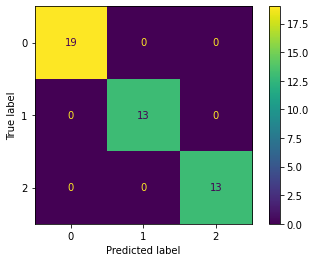

In [167]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

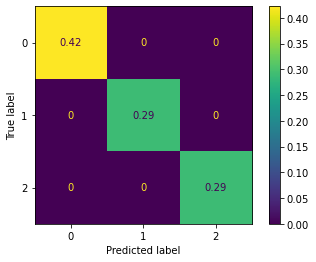

In [168]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="all")

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [170]:
logit.predict_proba(X_test)

array([[0.004, 0.812, 0.184],
       [0.942, 0.058, 0.   ],
       [0.   , 0.002, 0.998],
       [0.007, 0.773, 0.22 ],
       [0.002, 0.751, 0.247],
       [0.95 , 0.05 , 0.   ],
       [0.078, 0.904, 0.018],
       [0.   , 0.147, 0.852],
       [0.002, 0.781, 0.217],
       [0.029, 0.941, 0.03 ],
       [0.   , 0.225, 0.774],
       [0.963, 0.037, 0.   ],
       [0.969, 0.031, 0.   ],
       [0.956, 0.044, 0.   ],
       [0.977, 0.023, 0.   ],
       [0.005, 0.663, 0.332],
       [0.   , 0.027, 0.973],
       [0.028, 0.945, 0.027],
       [0.009, 0.82 , 0.171],
       [0.   , 0.041, 0.959],
       [0.959, 0.041, 0.   ],
       [0.001, 0.387, 0.612],
       [0.956, 0.044, 0.   ],
       [0.   , 0.052, 0.948],
       [0.   , 0.02 , 0.98 ],
       [0.   , 0.106, 0.894],
       [0.   , 0.07 , 0.93 ],
       [0.   , 0.019, 0.981],
       [0.961, 0.039, 0.   ],
       [0.95 , 0.05 , 0.   ],
       [0.993, 0.007, 0.   ],
       [0.981, 0.019, 0.   ],
       [0.007, 0.89 , 0.103],
       [0.

In [171]:
logit.decision_function(X_test)

array([[ -3.03 ,   2.258,   0.771],
       [  5.696,   2.908,  -8.604],
       [ -9.916,   1.875,   8.041],
       [ -2.734,   1.996,   0.739],
       [ -3.732,   2.422,   1.31 ],
       [  5.83 ,   2.884,  -8.714],
       [ -0.331,   2.122,  -1.791],
       [ -5.057,   1.652,   3.406],
       [ -3.423,   2.352,   1.071],
       [ -1.173,   2.306,  -1.133],
       [ -4.522,   1.644,   2.878],
       [  6.24 ,   2.989,  -9.229],
       [  6.524,   3.074,  -9.598],
       [  6.059,   2.979,  -9.038],
       [  6.395,   2.666,  -9.06 ],
       [ -3.06 ,   1.876,   1.184],
       [ -6.481,   1.443,   5.038],
       [ -1.17 ,   2.36 ,  -1.19 ],
       [ -2.508,   2.037,   0.471],
       [ -6.159,   1.509,   4.65 ],
       [  5.903,   2.757,  -8.661],
       [ -3.886,   1.714,   2.173],
       [  5.764,   2.678,  -8.442],
       [ -6.063,   1.581,   4.482],
       [ -7.528,   1.828,   5.701],
       [ -5.291,   1.577,   3.714],
       [ -6.613,   2.012,   4.601],
       [ -6.753,   1.417,   

In [172]:
logit.intercept_[0] + (logit.coef_[0]*X_test.iloc[0].values).sum()

-3.0298877898501555

In [173]:
logit.intercept_[1] + (logit.coef_[1]*X_test.iloc[0].values).sum()

2.258475252358686

In [174]:
logit.intercept_[2] + (logit.coef_[2]*X_test.iloc[0].values).sum()

0.7714125374916669

In [175]:
logit.intercept_[0] + (logit.coef_[0]*X_test.iloc[1].values).sum()

5.696172952877531

In [176]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [177]:
logit.score(X_test,y_test)

1.0

___
___
___

### Problema 5 - breast cancer

Base `breast_cancer.csv` na pasta `/datasets`

In [178]:
df = pd.read_csv('datasets/breast_cancer.csv')

In [179]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,...,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,842517,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,...,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,84300903,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,...,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,84348301,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,84358402,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,...,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [180]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [181]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [182]:
df.drop(columns='id', inplace=True)

In [183]:
df.replace({"M": 1, 'B': 0}, inplace=True)

In [184]:
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

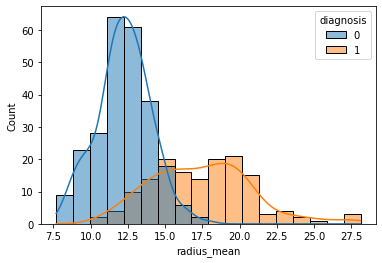

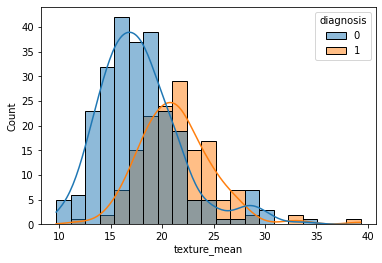

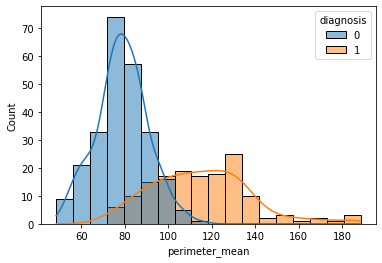

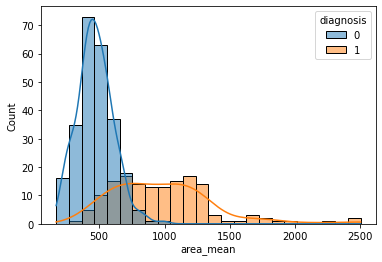

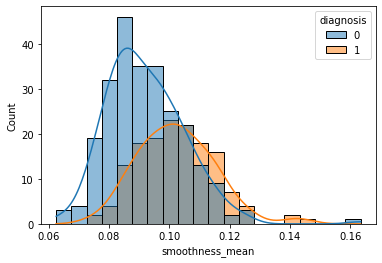

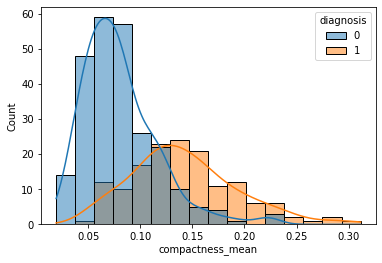

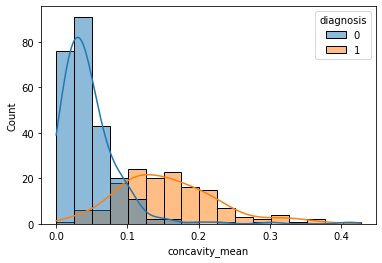

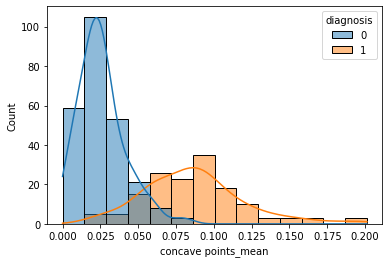

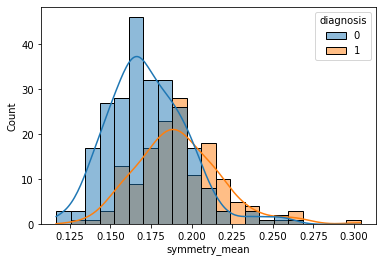

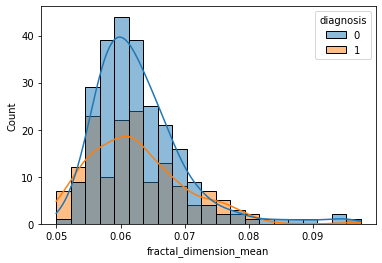

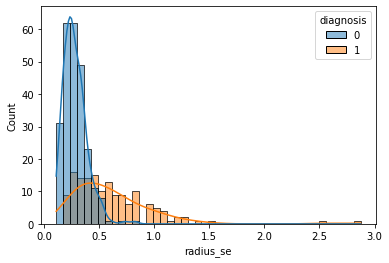

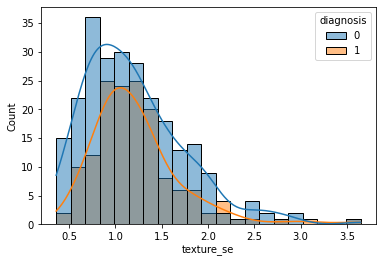

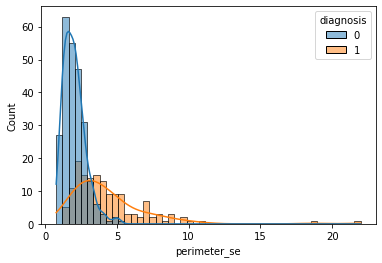

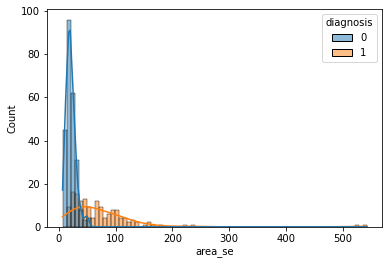

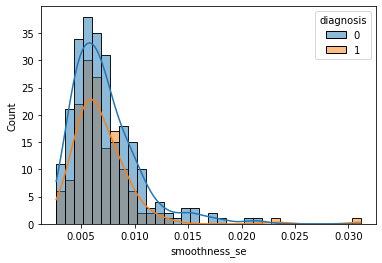

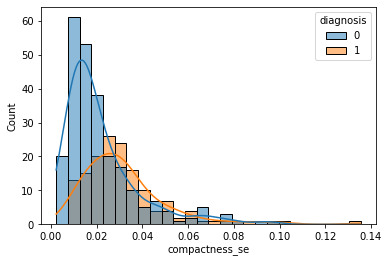

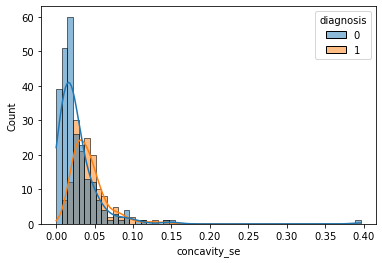

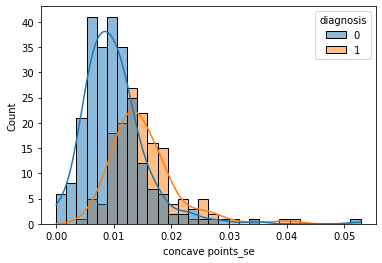

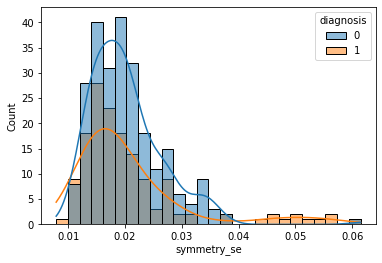

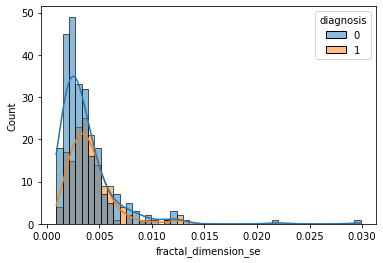

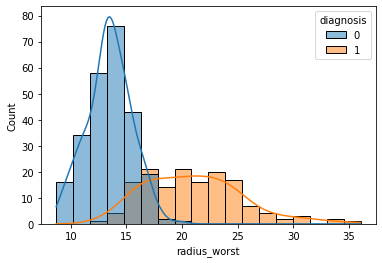

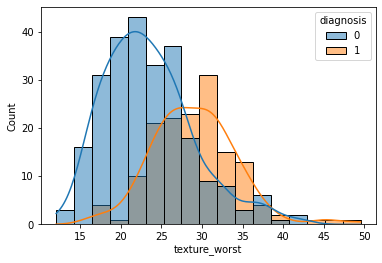

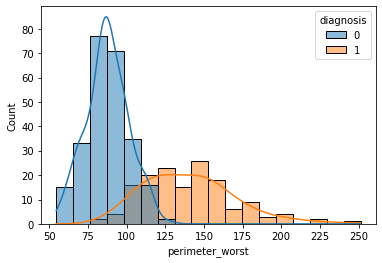

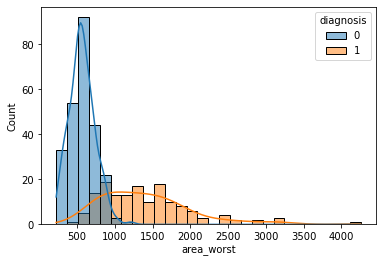

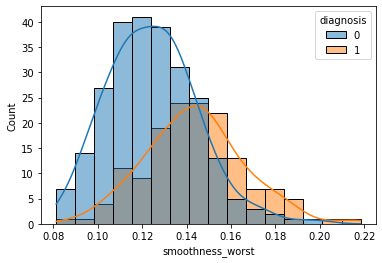

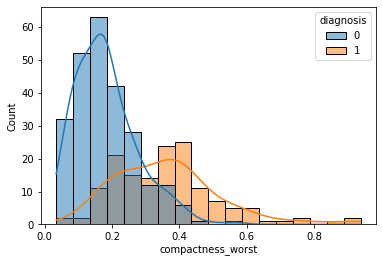

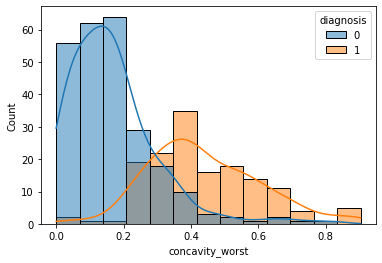

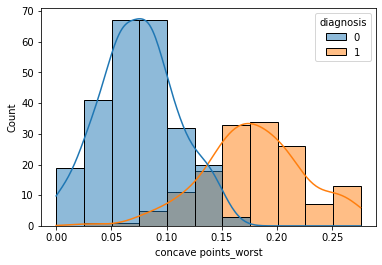

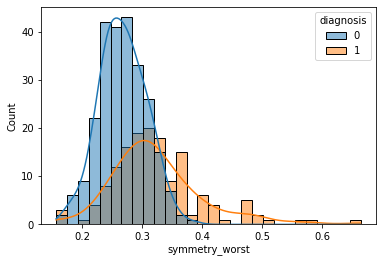

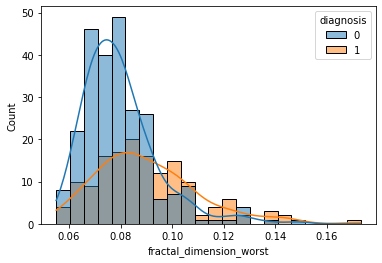

In [186]:
for col in X_train:
    
    sns.histplot(data=X_train, x=col, kde=True, hue=y_train)
    
    plt.show()

In [187]:
logit = LogisticRegression().fit(X_train, y_train)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [188]:
logit.intercept_

array([-0.182])

In [189]:
logit.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [190]:
logit.coef_

array([[-1.002, -0.484, -0.249,  0.018,  0.036,  0.179,  0.251,  0.108,
         0.056,  0.011, -0.033, -0.442, -0.064,  0.111,  0.003,  0.038,
         0.052,  0.014,  0.013,  0.003, -1.021,  0.543,  0.234,  0.011,
         0.066,  0.541,  0.673,  0.199,  0.181,  0.05 ]])

In [191]:
logit.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [192]:
logit.classes_

array([0, 1], dtype=int64)

In [193]:
proba_1 = logit.predict_proba(X_test)[:, 1]

proba_1

array([0.13 , 1.   , 0.993, 0.003, 0.001, 1.   , 1.   , 0.996, 0.004,
       0.018, 0.044, 1.   , 0.013, 0.526, 0.005, 0.999, 0.004, 0.   ,
       0.006, 1.   , 0.156, 0.035, 1.   , 0.006, 0.011, 0.001, 0.004,
       0.004, 0.007, 1.   , 0.004, 0.002, 0.036, 0.014, 0.002, 0.004,
       0.997, 0.02 , 1.   , 0.085, 0.002, 0.999, 0.001, 0.01 , 0.003,
       0.045, 0.002, 0.017, 0.068, 0.005, 1.   , 1.   , 0.038, 0.003,
       0.001, 0.017, 0.002, 1.   , 0.158, 0.   , 0.017, 1.   , 1.   ,
       0.024, 0.014, 0.045, 1.   , 1.   , 0.007, 0.011, 0.993, 1.   ,
       0.011, 0.884, 0.02 , 0.001, 0.082, 0.347, 0.006, 0.016, 0.999,
       0.011, 0.596, 1.   , 1.   , 0.92 , 0.985, 1.   , 0.004, 0.019,
       0.046, 0.055, 0.065, 0.012, 0.002, 0.005, 1.   , 1.   , 0.   ,
       1.   , 1.   , 0.   , 1.   , 0.996, 0.175, 0.305, 0.009, 1.   ,
       0.048, 0.199, 1.   , 0.005, 0.781, 1.   , 0.012, 1.   , 0.005,
       0.077, 0.002, 0.996, 0.438, 0.003, 0.013, 1.   , 0.081, 1.   ,
       0.999, 0.03 ,

In [194]:
y_pred = logit.predict(X_test)

In [195]:
print(confusion_matrix(y_test, y_pred))

[[107   1]
 [  4  59]]


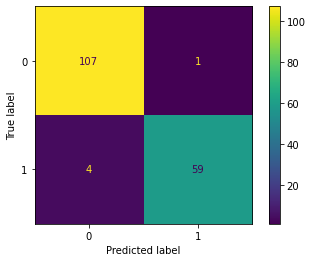

In [196]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [197]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



Métricas de avaliação de treino


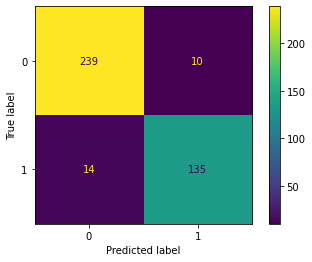

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       249
           1       0.93      0.91      0.92       149

    accuracy                           0.94       398
   macro avg       0.94      0.93      0.94       398
weighted avg       0.94      0.94      0.94       398



In [198]:
cr_train = clf_metrics(logit, X_train, y_train, label_metrica="treino", cutoff=0.5)

Métricas de avaliação de teste


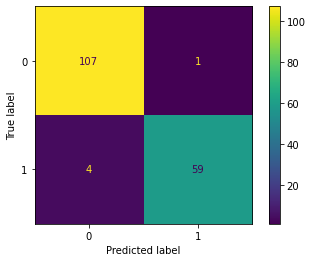

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [199]:
cr_test = clf_metrics(logit, X_test, y_test, label_metrica="teste", cutoff=0.5)


################################################################################
                         Modelo logit com cutoff = 0.1                          
################################################################################

Métricas de avaliação de teste


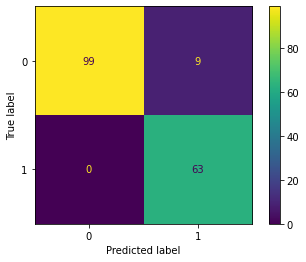

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       108
           1       0.88      1.00      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.94       171
weighted avg       0.95      0.95      0.95       171


################################################################################
                 Modelo logit com cutoff = 0.15000000000000002                  
################################################################################

Métricas de avaliação de teste


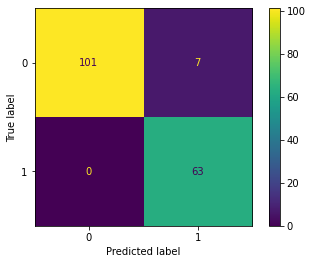

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       108
           1       0.90      1.00      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.97      0.96       171
weighted avg       0.96      0.96      0.96       171


################################################################################
                 Modelo logit com cutoff = 0.20000000000000004                  
################################################################################

Métricas de avaliação de teste


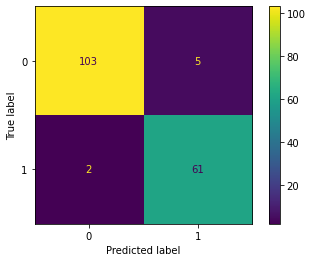

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


################################################################################
                 Modelo logit com cutoff = 0.25000000000000006                  
################################################################################

Métricas de avaliação de teste


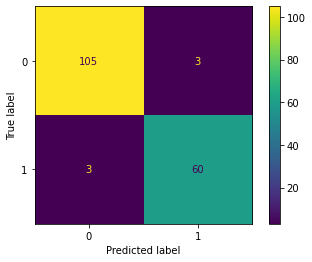

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


################################################################################
                 Modelo logit com cutoff = 0.30000000000000004                  
################################################################################

Métricas de avaliação de teste


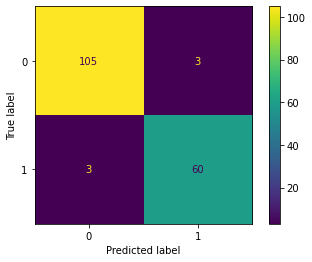

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


################################################################################
                  Modelo logit com cutoff = 0.3500000000000001                  
################################################################################

Métricas de avaliação de teste


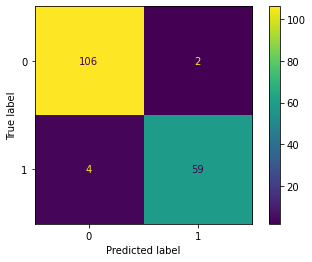

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


################################################################################
                 Modelo logit com cutoff = 0.40000000000000013                  
################################################################################

Métricas de avaliação de teste


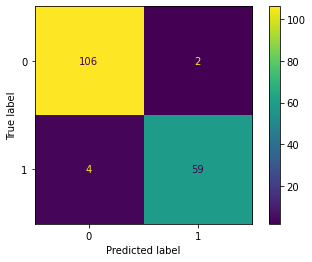

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


################################################################################
                 Modelo logit com cutoff = 0.45000000000000007                  
################################################################################

Métricas de avaliação de teste


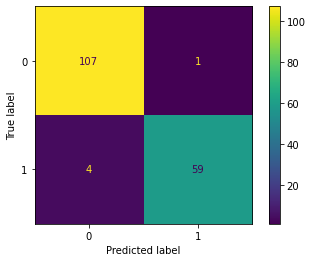

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


################################################################################
                  Modelo logit com cutoff = 0.5000000000000001                  
################################################################################

Métricas de avaliação de teste


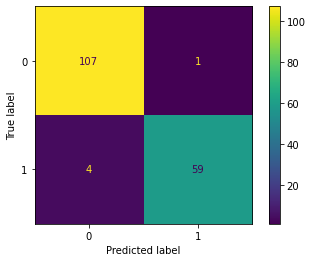

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


################################################################################
                  Modelo logit com cutoff = 0.5500000000000002                  
################################################################################

Métricas de avaliação de teste


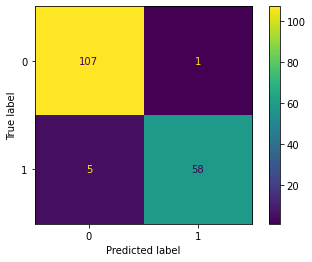

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171


################################################################################
                  Modelo logit com cutoff = 0.6000000000000002                  
################################################################################

Métricas de avaliação de teste


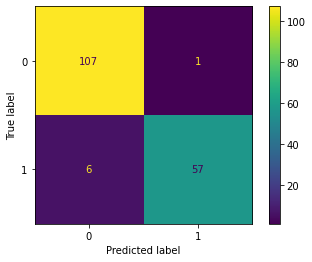

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


################################################################################
                  Modelo logit com cutoff = 0.6500000000000001                  
################################################################################

Métricas de avaliação de teste


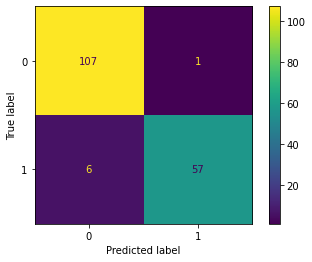

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


################################################################################
                  Modelo logit com cutoff = 0.7000000000000002                  
################################################################################

Métricas de avaliação de teste


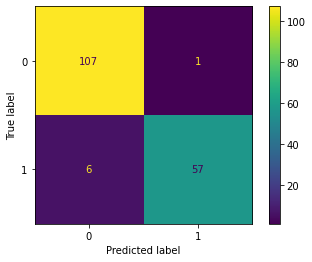

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


################################################################################
                  Modelo logit com cutoff = 0.7500000000000002                  
################################################################################

Métricas de avaliação de teste


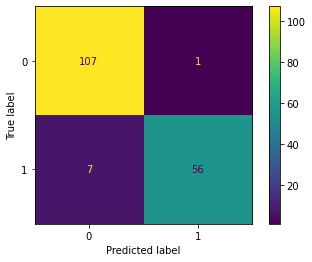

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.98      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171


################################################################################
                  Modelo logit com cutoff = 0.8000000000000002                  
################################################################################

Métricas de avaliação de teste


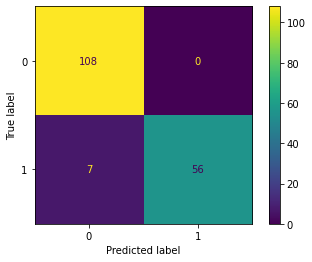

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       108
           1       1.00      0.89      0.94        63

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171


################################################################################
                  Modelo logit com cutoff = 0.8500000000000002                  
################################################################################

Métricas de avaliação de teste


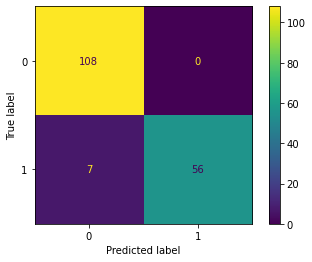

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       108
           1       1.00      0.89      0.94        63

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171


################################################################################
                  Modelo logit com cutoff = 0.9000000000000002                  
################################################################################

Métricas de avaliação de teste


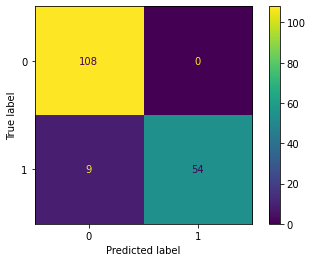

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       108
           1       1.00      0.86      0.92        63

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171


################################################################################
                  Modelo logit com cutoff = 0.9500000000000003                  
################################################################################

Métricas de avaliação de teste


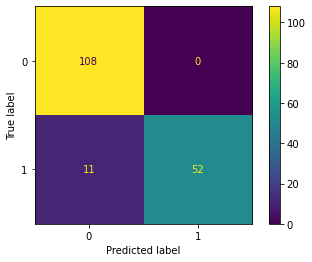

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       108
           1       1.00      0.83      0.90        63

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [200]:
# começamos com dois dfs vazios, e vamos preenchendo abaixo
# (com os concats)
df_results_train = pd.DataFrame()
df_results_test = pd.DataFrame()

cutoff_list = np.arange(0.1, 1, 0.05)

for cutoff in cutoff_list:
    
    print()
    print("#"*80)
    print(f"Modelo logit com cutoff = {cutoff}".center(80))
    print("#"*80)
    print()
    
    # ============================================
    
    cr_train = clf_metrics(logit, X_train, y_train, label_metrica="treino", cutoff=cutoff, print_plot=False)
    df_cr_train = pd.DataFrame(cr_train)

    # o .iloc[:-1, :] é pra excluir o "support" (pode trazer tb caso queira)
    df_melt = df_cr_train.iloc[:-1, :].reset_index(drop=False).melt(id_vars='index', var_name="type")
    df_melt['cutoff'] = cutoff

    # corrigindo os dados de acurácia
    accuracy = df_melt.query("type == 'accuracy'").copy()
    accuracy["index"] = "accuracy"

    df_melt = df_melt.drop(index=accuracy.index)
    df_melt = pd.concat([df_melt, accuracy.iloc[[0], :]]).reset_index(drop=False)

    # pivotando
    df_pivot = df_melt.pivot(columns=['type', 'index'], values='value', index='cutoff')
    
    df_results_train = pd.concat([df_results_train, df_pivot])
            
    # ============================================
    
    cr_test = clf_metrics(logit, X_test, y_test, label_metrica="teste", cutoff=cutoff)
    df_cr_test = pd.DataFrame(cr_test)
    
    # o .iloc[:-1, :] é pra excluir o "support" (pode trazer tb caso queira)
    df_melt = df_cr_test.iloc[:-1, :].reset_index(drop=False).melt(id_vars='index', var_name="type")
    df_melt['cutoff'] = cutoff

    # corrigindo os dados de acurácia
    accuracy = df_melt.query("type == 'accuracy'").copy()
    accuracy["index"] = "accuracy"

    df_melt = df_melt.drop(index=accuracy.index)
    df_melt = pd.concat([df_melt, accuracy.iloc[[0], :]]).reset_index(drop=False)

    # pivotando
    df_pivot = df_melt.pivot(columns=['type', 'index'], values='value', index='cutoff')
    
    df_results_test = pd.concat([df_results_test, df_pivot])
    
    # ============================================

In [214]:
df_results_train

df_results_train.sort_values(('1', 'precision'), ascending=False)

type           0                         1                 macro avg         \
index  precision recall f1-score precision recall f1-score precision recall   
cutoff                                                                        
0.950      0.864  0.996    0.925     0.991  0.738    0.846     0.928  0.867   
0.750      0.908  0.988    0.946     0.976  0.832    0.899     0.942  0.910   
0.800      0.898  0.988    0.941     0.976  0.812    0.886     0.937  0.900   
0.850      0.891  0.988    0.937     0.975  0.799    0.878     0.933  0.893   
0.900      0.888  0.988    0.935     0.975  0.792    0.874     0.932  0.890   
0.700      0.917  0.980    0.948     0.962  0.852    0.904     0.940  0.916   
0.650      0.931  0.976    0.953     0.956  0.879    0.916     0.944  0.928   
0.600      0.938  0.972    0.955     0.950  0.893    0.920     0.944  0.932   
0.550      0.938  0.972    0.955     0.950  0.893    0.920     0.944  0.932   
0.500      0.945  0.960    0.952     0.931  0.906    0.918     0.938  0.933   
0.400      0.952  0.952    0.952     0.919  0.919    0.919     0.936  0.936   
0.450      0.944  0.952    0.948     0.918  0.906    0.912     0.931  0.929   
0.250      0.971  0.936    0.953     0.899  0.953    0.925     0.935  0.944   
0.300      0.963  0.936    0.949     0.897  0.940    0.918     0.930  0.938   
0.350      0.959  0.936    0.947     0.897  0.933    0.914     0.928  0.934   
0.200      0.983  0.908    0.944     0.863  0.973    0.915     0.923  0.940   
0.150      0.987  0.888    0.934     0.839  0.980    0.904     0.913  0.934   
0.100      0.995  0.831    0.906     0.779  0.993    0.873     0.887  0.912   

type            weighted avg                 accuracy  
index  f1-score    precision recall f1-score accuracy  
cutoff                                                 
0.950     0.886        0.912  0.899    0.896    0.899  
0.750     0.922        0.933  0.930    0.928    0.930  
0.800     0.914        0.927  0.922    0.920    0.922  
0.850     0.908        0.923  0.917    0.915    0.917  
0.900     0.905        0.921  0.915    0.912    0.915  
0.700     0.926        0.934  0.932    0.931    0.932  
0.650     0.935        0.940  0.940    0.939    0.940  
0.600     0.938        0.942  0.942    0.942    0.942  
0.550     0.938        0.942  0.942    0.942    0.942  
0.500     0.935        0.940  0.940    0.940    0.940  
0.400     0.936        0.940  0.940    0.940    0.940  
0.450     0.930        0.935  0.935    0.935    0.935  
0.250     0.939        0.944  0.942    0.943    0.942  
0.300     0.934        0.938  0.937    0.937    0.937  
0.350     0.931        0.936  0.935    0.935    0.935  
0.200     0.929        0.938  0.932    0.933    0.932  
0.150     0.919        0.931  0.922    0.923    0.922  
0.100     0.890        0.914  0.892    0.894    0.892

In [202]:
df_results_test

df_results_test.sort_values(('1', 'f1-score'), ascending=False)

type           0                         1                 macro avg         \
index  precision recall f1-score precision recall f1-score precision recall   
cutoff                                                                        
0.450      0.964  0.991    0.977     0.983  0.937    0.959     0.974  0.964   
0.500      0.964  0.991    0.977     0.983  0.937    0.959     0.974  0.964   
0.250      0.972  0.972    0.972     0.952  0.952    0.952     0.962  0.962   
0.300      0.972  0.972    0.972     0.952  0.952    0.952     0.962  0.962   
0.350      0.964  0.981    0.972     0.967  0.937    0.952     0.965  0.959   
0.400      0.964  0.981    0.972     0.967  0.937    0.952     0.965  0.959   
0.550      0.955  0.991    0.973     0.983  0.921    0.951     0.969  0.956   
0.150      1.000  0.935    0.967     0.900  1.000    0.947     0.950  0.968   
0.200      0.981  0.954    0.967     0.924  0.968    0.946     0.953  0.961   
0.600      0.947  0.991    0.968     0.983  0.905    0.942     0.965  0.948   
0.650      0.947  0.991    0.968     0.983  0.905    0.942     0.965  0.948   
0.700      0.947  0.991    0.968     0.983  0.905    0.942     0.965  0.948   
0.800      0.939  1.000    0.969     1.000  0.889    0.941     0.970  0.944   
0.850      0.939  1.000    0.969     1.000  0.889    0.941     0.970  0.944   
0.100      1.000  0.917    0.957     0.875  1.000    0.933     0.938  0.958   
0.750      0.939  0.991    0.964     0.982  0.889    0.933     0.961  0.940   
0.900      0.923  1.000    0.960     1.000  0.857    0.923     0.962  0.929   
0.950      0.908  1.000    0.952     1.000  0.825    0.904     0.954  0.913   

type            weighted avg                 accuracy  
index  f1-score    precision recall f1-score accuracy  
cutoff                                                 
0.450     0.968        0.971  0.971    0.971    0.971  
0.500     0.968        0.971  0.971    0.971    0.971  
0.250     0.962        0.965  0.965    0.965    0.965  
0.300     0.962        0.965  0.965    0.965    0.965  
0.350     0.962        0.965  0.965    0.965    0.965  
0.400     0.962        0.965  0.965    0.965    0.965  
0.550     0.962        0.966  0.965    0.965    0.965  
0.150     0.957        0.963  0.959    0.959    0.959  
0.200     0.956        0.960  0.959    0.959    0.959  
0.600     0.955        0.960  0.959    0.959    0.959  
0.650     0.955        0.960  0.959    0.959    0.959  
0.700     0.955        0.960  0.959    0.959    0.959  
0.800     0.955        0.962  0.959    0.959    0.959  
0.850     0.955        0.962  0.959    0.959    0.959  
0.100     0.945        0.954  0.947    0.948    0.947  
0.750     0.949        0.955  0.953    0.953    0.953  
0.900     0.942        0.951  0.947    0.946    0.947  
0.950     0.928        0.942  0.936    0.934    0.936

In [203]:
df_results_test

df_results_test.sort_values(('weighted avg', 'f1-score'), ascending=False)

type           0                         1                 macro avg         \
index  precision recall f1-score precision recall f1-score precision recall   
cutoff                                                                        
0.450      0.964  0.991    0.977     0.983  0.937    0.959     0.974  0.964   
0.500      0.964  0.991    0.977     0.983  0.937    0.959     0.974  0.964   
0.250      0.972  0.972    0.972     0.952  0.952    0.952     0.962  0.962   
0.300      0.972  0.972    0.972     0.952  0.952    0.952     0.962  0.962   
0.350      0.964  0.981    0.972     0.967  0.937    0.952     0.965  0.959   
0.400      0.964  0.981    0.972     0.967  0.937    0.952     0.965  0.959   
0.550      0.955  0.991    0.973     0.983  0.921    0.951     0.969  0.956   
0.150      1.000  0.935    0.967     0.900  1.000    0.947     0.950  0.968   
0.200      0.981  0.954    0.967     0.924  0.968    0.946     0.953  0.961   
0.600      0.947  0.991    0.968     0.983  0.905    0.942     0.965  0.948   
0.650      0.947  0.991    0.968     0.983  0.905    0.942     0.965  0.948   
0.700      0.947  0.991    0.968     0.983  0.905    0.942     0.965  0.948   
0.850      0.939  1.000    0.969     1.000  0.889    0.941     0.970  0.944   
0.800      0.939  1.000    0.969     1.000  0.889    0.941     0.970  0.944   
0.750      0.939  0.991    0.964     0.982  0.889    0.933     0.961  0.940   
0.100      1.000  0.917    0.957     0.875  1.000    0.933     0.938  0.958   
0.900      0.923  1.000    0.960     1.000  0.857    0.923     0.962  0.929   
0.950      0.908  1.000    0.952     1.000  0.825    0.904     0.954  0.913   

type            weighted avg                 accuracy  
index  f1-score    precision recall f1-score accuracy  
cutoff                                                 
0.450     0.968        0.971  0.971    0.971    0.971  
0.500     0.968        0.971  0.971    0.971    0.971  
0.250     0.962        0.965  0.965    0.965    0.965  
0.300     0.962        0.965  0.965    0.965    0.965  
0.350     0.962        0.965  0.965    0.965    0.965  
0.400     0.962        0.965  0.965    0.965    0.965  
0.550     0.962        0.966  0.965    0.965    0.965  
0.150     0.957        0.963  0.959    0.959    0.959  
0.200     0.956        0.960  0.959    0.959    0.959  
0.600     0.955        0.960  0.959    0.959    0.959  
0.650     0.955        0.960  0.959    0.959    0.959  
0.700     0.955        0.960  0.959    0.959    0.959  
0.850     0.955        0.962  0.959    0.959    0.959  
0.800     0.955        0.962  0.959    0.959    0.959  
0.750     0.949        0.955  0.953    0.953    0.953  
0.100     0.945        0.954  0.947    0.948    0.947  
0.900     0.942        0.951  0.947    0.946    0.947  
0.950     0.928        0.942  0.936    0.934    0.936

In [204]:
y_proba_1 = logit.predict_proba(X_test)[:, 1]

In [205]:
precisions, recalls, cutoffs = precision_recall_curve(y_test, y_proba_1)

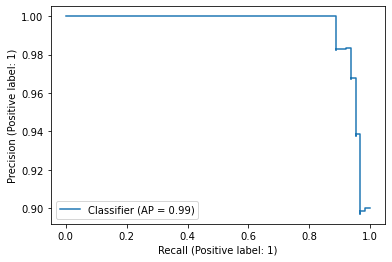

In [206]:
PrecisionRecallDisplay.from_predictions(y_test, y_proba_1);

In [207]:
cutoffs[np.where(precisions == recalls)]

array([0.305])

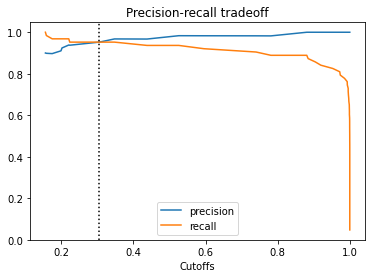

In [208]:
plt.title("Precision-recall tradeoff")

plt.plot(cutoffs, precisions[:-1], label="precision")
plt.plot(cutoffs, recalls[:-1], label="recall")

plt.xlabel("Cutoffs")

ponto_de_encontro = cutoffs[np.where(precisions == recalls)]
plt.axvline(x=ponto_de_encontro, ls=":", color="k")

plt.legend()
plt.show()

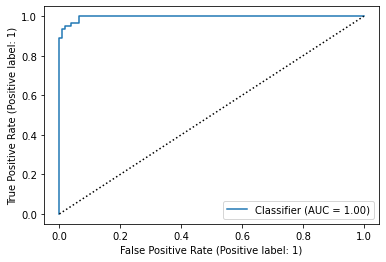

In [213]:
RocCurveDisplay.from_predictions(y_test, y_proba_1)

x = np.linspace(0, 1, 2)
plt.plot(x, x, color="k", ls=":");

In [210]:
roc_auc_score(y_test, y_proba_1)

0.9966196355085244

In [211]:
from sklearn.linear_model import Lasso

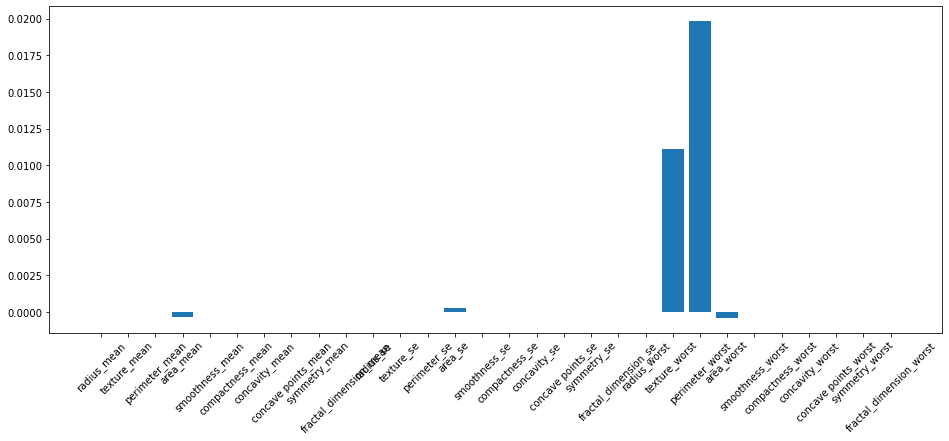

In [212]:
X = df.drop(columns="diagnosis", axis=1).values
y = df["diagnosis"].values
names = df.drop(columns="diagnosis", axis=1).columns
lasso = Lasso(alpha= .1)
lasso_coef = lasso.fit(X,y).coef_
plt.figure(figsize=(16,6))
plt.bar(names,lasso_coef)
plt.xticks(rotation=45)
plt.show()

___
___
___

### Problema 6 - VOCÊ ESCOLHE!

Entre no [Kaggle](https://www.kaggle.com/), ou consiga dados **supervisionados** (com o target desejado) em qualquer outra fonte, e faça o que fizemos acima!

___
___
___